# **Retail Sales Analysis**

## I. Introduction
This project presents a comprehensive analysis of a 3-month simulated retail sales dataset. It covers the complete data workflow, including data cleaning, exploratory analysis (EDA), and visualization.

## II. Business Objectives
This analysis aims to answer the following business questions:

1. What are the daily, weekly, and monthly sales and profits? What are the averages?

2. Which products generate the highest revenue and profit?

3. Which product categories drive the most revenue and profit?

4. Do discounts affect profit or the number of units sold?

5. Which region generates the most revenue and profit on average?

6. Which region has more new customers and which has more returning customers?

7. How much revenue and profit does each customer type generate on average?

8. What is the most commonly used payment method?

9. Which sales channel (in-store or online) is preferred, and which generates more revenue and profit?

10. Which product categories are most popular in each sales channel?

## III. Data Overview and Loading

The dataset used for this analysis is a simulated retail sales dataset, containing transactional data including product, pricing, customer type, sales region, and payment details

It was generated using AI tools to simulate realistic business activity

<br>

### Dataset Information
**Source**: AI generated mock dataset

**File**: retail_sales_data.csv

**Rows**: 914

**Columns**: 12

<br>

### Columns Description

| **Column Name**     | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| `order_id`          | Unique identifier for each order transaction                                   |
| `date`              | Date the order was placed or processed (format: YYYY-MM-DD)                    |
| `product_name`      | Name of the product sold in the order                                          |
| `category`          | Product category or type (e.g., Electronics, Apparel)                          |
| `units_sold`        | Number of units of the product sold in the transaction                         |
| `unit_price`        | Price per unit sold (before discount)                                          |
| `cost_per_unit`     | Cost incurred per unit sold (used to calculate profit)                         |
| `discount`          | Discount applied to the unit price (as a decimal, e.g., 0.10 for 10%)          |
| `region`            | Geographical region where the order was placed or delivered                    |
| `customer_type`     | Type of customer (New or Returning, Unknown)                               |
| `payment_method`    | Method used for payment (Card, Cash, E-wallet)                                     |
| `sales_channel`     | Source of the sale (Online or In-store)   

### Code for Loading the Dataset

#### Data Collection

In [76]:
# from google.colab import drive
# drive.mount('/content/drive')

# Getting the file path
file_path = "/content/drive/MyDrive/Projects/data_source_files/retail_sales_data.csv"

#### Loading the Dataset and Data Preview

In [77]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Setting the style for graphs
sns.set_style(style="whitegrid")

# Disabling warnings for clean layout
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv(file_path, parse_dates=["date"]) # Setting date to datetime type

# Getting the row and column count
print(f"rows: {df.shape[0]}\ncolumns: {df.shape[1]}")

# Preview of the first few rows
df.head()

rows: 914
columns: 12


,order_id,date,product_name,category,units_sold,unit_price,cost_per_unit,discount,region,customer_type,payment_method,sales_channel
0,ORD1000,2025-01-01,Bluetooth Speaker,Electronics,2,35.99,15.0,0.11,North,New,Cash,In-store
1,ORD1001,2025-01-01,Phone Case,Electronics,3,10.99,2.5,0.15,North,New,Cash,In-store
2,ORD1002,2025-01-01,Phone Case,Electronics,5,10.99,2.5,0.07,East,New,Cash,In-store
3,ORD1003,2025-01-01,Notebook,Stationery,5,4.99,1.5,0.07,North,New,E-Wallet,In-store
4,ORD1004,2025-01-01,Bluetooth Speaker,Electronics,1,35.99,15.0,0.11,South,New,Card,Online


## IV. Data Cleaning and Validation

### A. Identify Inconsistent format and data type
Goal: To see which columns have inconsistent and incorrect format and data type

In [78]:
# Gets the column names, rows, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        914 non-null    object        
 1   date            914 non-null    datetime64[ns]
 2   product_name    914 non-null    object        
 3   category        914 non-null    object        
 4   units_sold      914 non-null    int64         
 5   unit_price      914 non-null    float64       
 6   cost_per_unit   914 non-null    float64       
 7   discount        914 non-null    float64       
 8   region          878 non-null    object        
 9   customer_type   873 non-null    object        
 10  payment_method  914 non-null    object        
 11  sales_channel   914 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 85.8+ KB


All columns have correct data types

### B. Identify Missing Values
Goal: See which columns have missing data and how many

In [79]:
# Checks for missing values
df.isna().sum().reset_index()

,index,0
0,order_id,0
1,date,0
2,product_name,0
3,category,0
4,units_sold,0
5,unit_price,0
6,cost_per_unit,0
7,discount,0
8,region,36
9,customer_type,41


There are two columns with missing data:

**1. Region - 36** missing values

**2. Customer Type - 41** missing values

#### B1. Missing Values Analysis
Goal: To see if there's a pattern to the distribution of missing values on other categorical variables by using bar graphs

(76, 12)
product_name


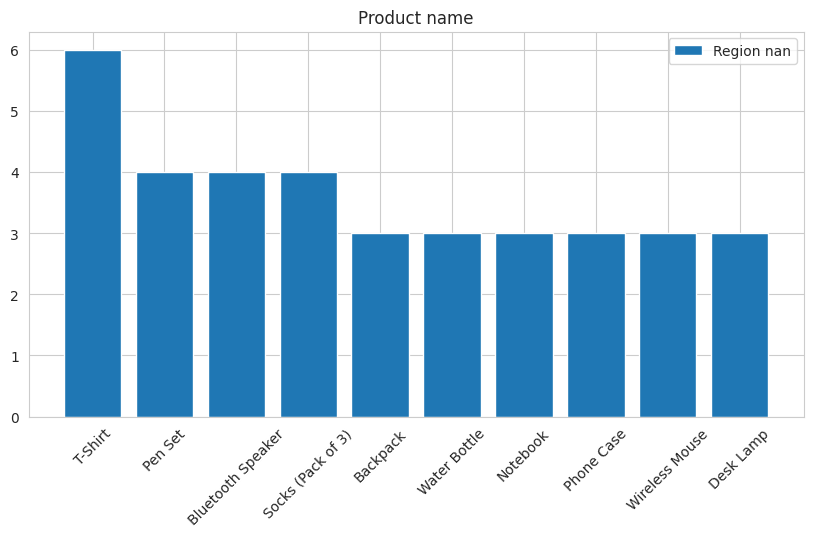

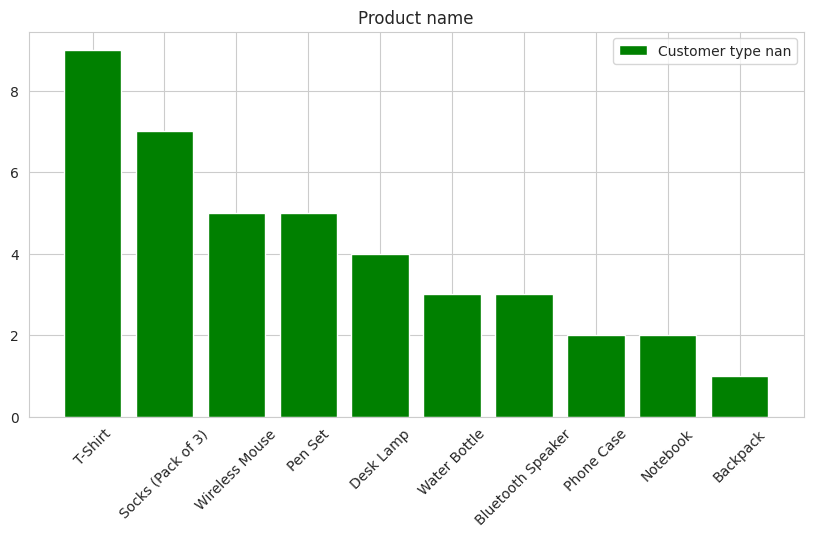

category


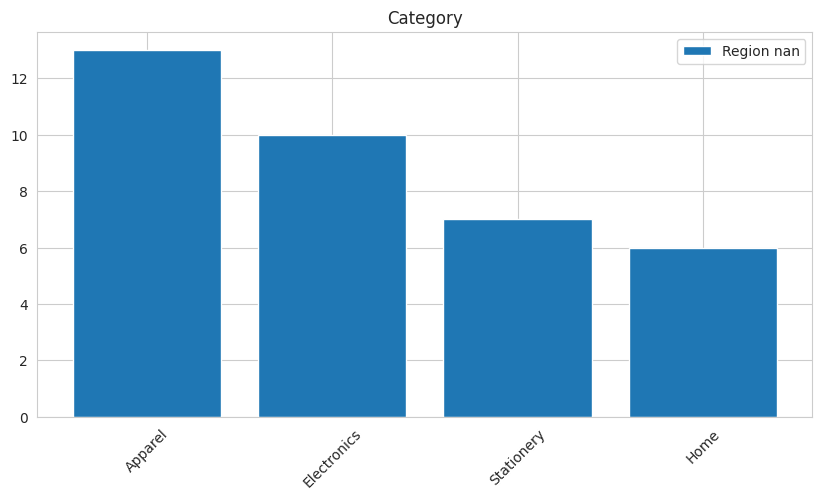

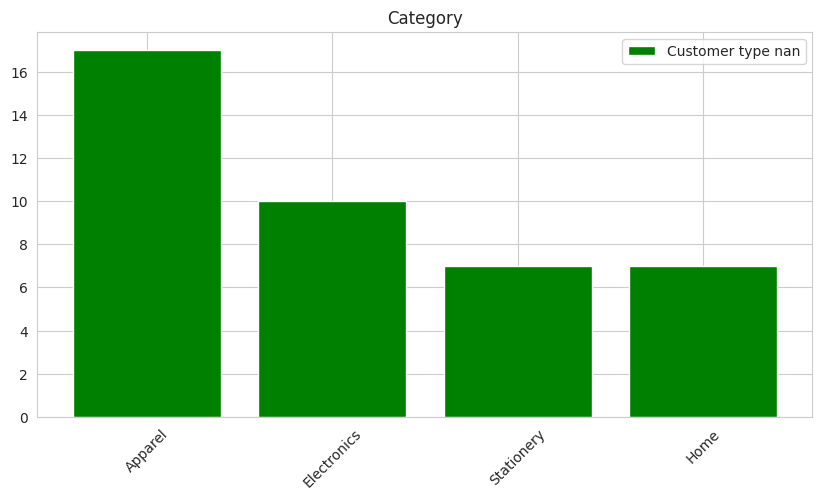

region


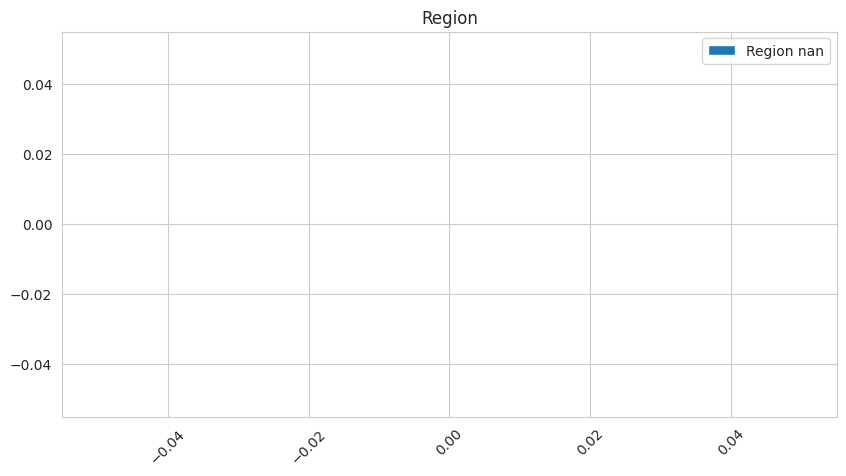

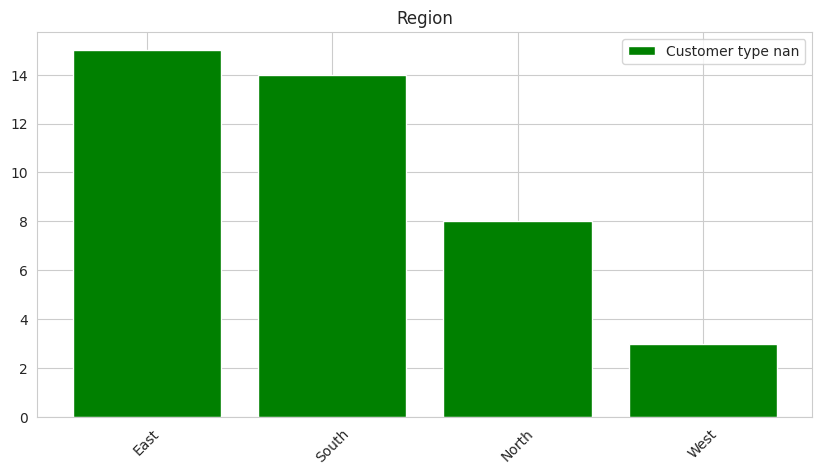

customer_type


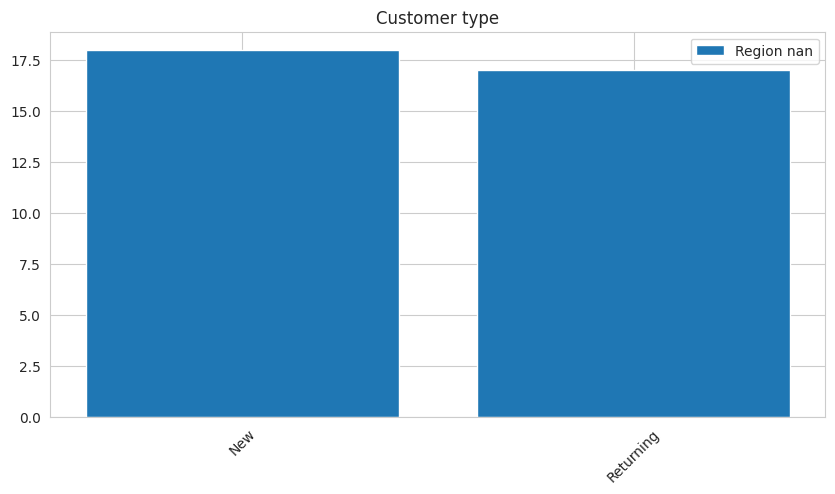

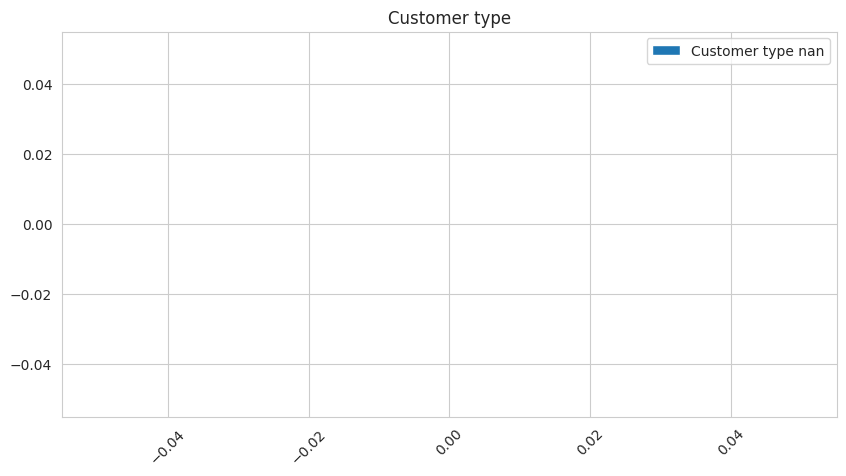

payment_method


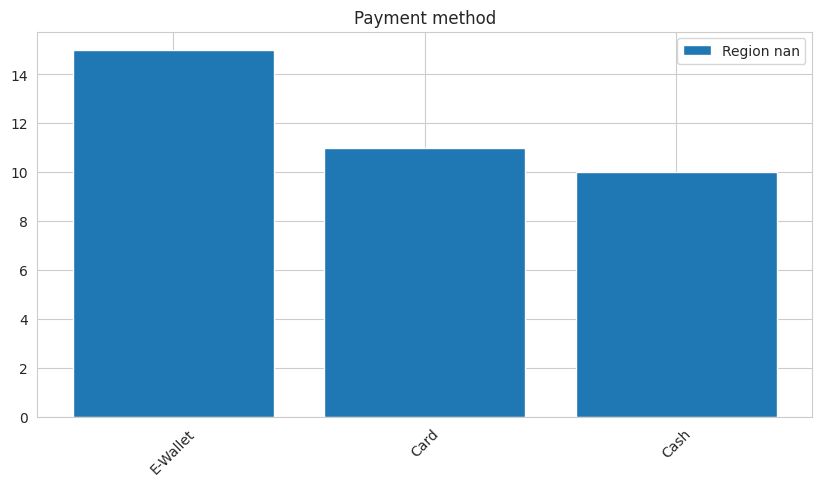

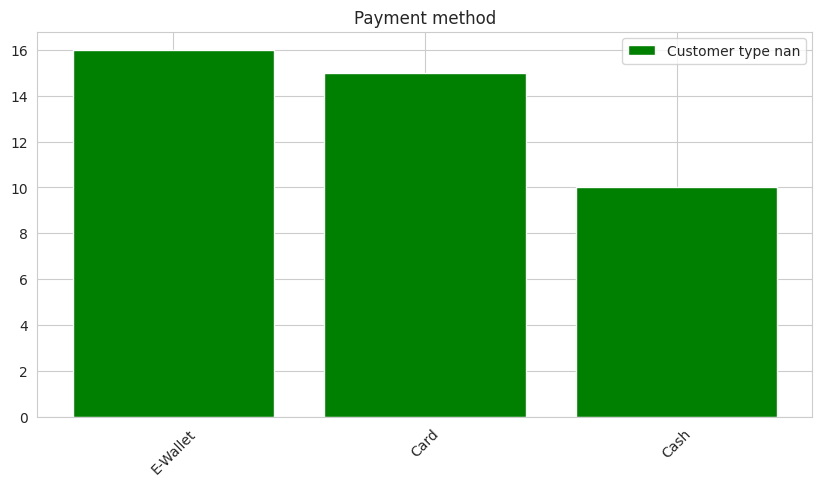

sales_channel


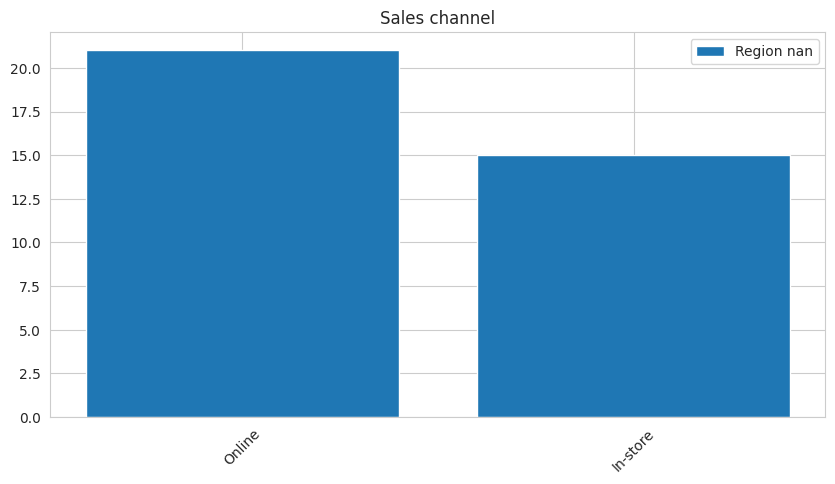

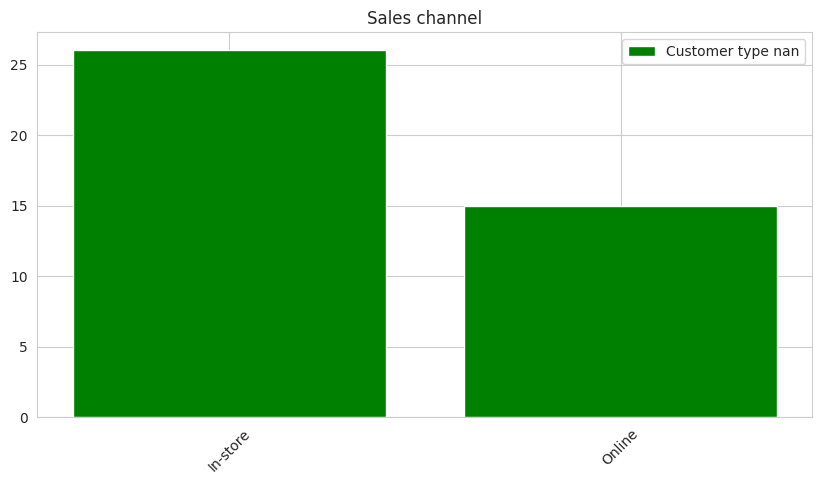

In [ ]:
# Filtering missing values
filters = (df["region"].isna()) | (df["customer_type"].isna())
# Making a copy of dataframe that has only missing values
df_isna = df.loc[filters].copy()

# Getting the dimension(rows, cols) of missing data
print(df_isna.shape)

# Filtering by region and customer type columns
region_filter = (df_isna["region"].isna())
customer_filter =  (df_isna["customer_type"].isna())

# Making bar graphs using for loop for efficiency to make a visual analysis
for col in df_isna.describe(include="object").columns[1:]:
  plt.figure(figsize=(10, 5))
  print(col)
  region = df_isna.loc[region_filter, col].value_counts()
  customer_type = df_isna.loc[customer_filter, col].value_counts()
  plt.bar(region.index, region.values, label="Region nan")
  plt.xticks(rotation=45)
  plt.legend()
  plt.title(col.replace("_", " ").capitalize())
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(10, 5))
  plt.bar(customer_type.index, customer_type.values, color="green", label="Customer type nan")
  plt.title(col.replace("_", " ").capitalize())
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()  
  plt.show()

There are no clear patterns for missing values in the customer_type and region columns

Imputing using random sampling may introduce artificial variation and affect insights, especially with a small dataset

**So, we’ll label these as "Unknown" instead of dropping rows, to preserve data volume**

In [81]:
# Labeling missing values with "Unknown"
df.fillna("Unknown", inplace=True)

# Checking if the changes are applied
for col in df.describe(include="object").columns[1:-1]:
  print(f"Column: {col}\n{df[col].unique()}\n")

Column: product_name
['Bluetooth Speaker' 'Phone Case' 'Notebook' 'Pen Set' 'Socks (Pack of 3)'
 'T-Shirt' 'Desk Lamp' 'Backpack' 'Water Bottle' 'Wireless Mouse']

Column: category
['Electronics' 'Stationery' 'Apparel' 'Home']

Column: region
['North' 'East' 'South' 'West' 'Unknown']

Column: customer_type
['New' 'Unknown' 'Returning']

Column: payment_method
['Cash' 'E-Wallet' 'Card']



### C. Identify Duplicates
Goal: To find duplicated data

In [82]:
# Gets the total of unique values
df["order_id"].nunique()

914

The data has **914 rows** and has **914 unique order ids**

Therefore, there are no duplicates in the transaction data

### D. Identify Invalid Values
Goal: Look for impossible or incorrect values (like negative units, very high units, mispellings, data entry errors)

In [83]:
# Checking unique values for categorical variables to see mispellings, and data errors
for col in df.describe(include="object").columns[1:-1]:
  print(f"Column: {col}\n{df[col].unique()}\n")


# Checking numerical data's range(min and max), mean/average, and median for invalid numerical values
df.describe().iloc[[0, 1, 2, 4, 6, 7]]

Column: product_name
['Bluetooth Speaker' 'Phone Case' 'Notebook' 'Pen Set' 'Socks (Pack of 3)'
 'T-Shirt' 'Desk Lamp' 'Backpack' 'Water Bottle' 'Wireless Mouse']

Column: category
['Electronics' 'Stationery' 'Apparel' 'Home']

Column: region
['North' 'East' 'South' 'West' 'Unknown']

Column: customer_type
['New' 'Unknown' 'Returning']

Column: payment_method
['Cash' 'E-Wallet' 'Card']



,date,units_sold,unit_price,cost_per_unit,discount
count,914,914.000000,914.000000,914.000000,914.000000
mean,2025-02-15 08:14:42.275710976,3.001094,16.051269,5.489606,0.103611
min,2025-01-01 00:00:00,-3.000000,4.990000,1.500000,0.000000
50%,2025-02-15 00:00:00,3.000000,11.990000,3.500000,0.100000
max,2025-03-31 00:00:00,5.000000,35.990000,15.000000,1.100000
std,NaN,1.462566,9.634763,4.186461,0.068897


There are **2 concerns** here;
1. Negative minimum value for units sold
2. A max discount value greater than 1, meaning its 110% discounted

Let's find out what are those

In [84]:
# Filtering data to get the incorrect values
disc_unit_filter = (df["units_sold"]<=0) | (df["discount"]>=1)
df.loc[disc_unit_filter]

,order_id,date,product_name,category,units_sold,unit_price,cost_per_unit,discount,region,customer_type,payment_method,sales_channel
19,ORD1019,2025-01-02,Notebook,Stationery,2,4.99,1.5,1.10,West,Returning,Card,Online
116,ORD1116,2025-01-12,T-Shirt,Apparel,-2,14.99,4.0,0.12,West,Returning,Cash,In-store
216,ORD1216,2025-01-24,Phone Case,Electronics,-3,10.99,2.5,0.07,South,Returning,E-Wallet,Online
708,ORD1708,2025-03-12,Backpack,Apparel,5,29.99,10.0,1.10,South,New,E-Wallet,In-store


In total, there are **4 incorrect values**

We're saving these for data quality checks later, but for now, we're going to remove them since they won't significantly affect our analysis

In [85]:
# Saving rows with incorrect values for data quality checks later
invalid_units = df[df["units_sold"]<=0].copy()
invalid_discounts = df[df["discount"]>=1].copy()

cleaned_df = df.loc[~disc_unit_filter].copy() # Creating a cleaned copy

# Checking cleaned data for issues after cleaning/ Data Validation
incorrect_values = cleaned_df.loc[disc_unit_filter]
if not incorrect_values.empty:
  print("There are still incorrect values in the dataset")
else:
  print("All incorrect values have been removed")

All incorrect values have been removed


Our data is now cleaned and ready for analysis

## V. Feature Engineering




To support revenue and profitability analysis we calculated 3 new columns:

1. sales: the total revenue generated per transaction after discount

2. total_cost: the cost incurred based on units sold

3. gross_profit: the difference between revenue and cost

These engineered fields enable detailed analysis across product, customer type, region, and time.

<br>

*Note: A profit margin field was considered; however, due to Looker Studio’s limitations in performing custom aggregations (especially when cross-filtering), pre-aggregating this metric could lead to misleading results. As a result, it was omitted from the dataset to maintain analytical integrity.*

In [86]:
# Adding new columns: profit, sales/revenue
cleaned_df["sales"] = round(cleaned_df["unit_price"]*cleaned_df["units_sold"]*(1-cleaned_df["discount"]), 2)
cleaned_df["total_cost"] = cleaned_df["units_sold"]*cleaned_df["cost_per_unit"]
cleaned_df["gross_profit"] = cleaned_df["sales"]-cleaned_df["total_cost"]

In [87]:
# Validating if the new columns are made and also if calculations are correct
cleaned_df.head()

# Validating negative or illogical values
cleaned_df[["sales", "total_cost", "gross_profit"]].describe()

,sales,total_cost,gross_profit
count,910.000000,910.000000,910.000000
mean,43.055945,16.406593,26.649352
std,34.820958,15.811912,19.722926
min,4.040000,1.500000,2.540000
25%,18.580000,6.000000,12.067500
50%,32.030000,10.000000,20.520000
75%,54.550000,20.000000,36.350000
max,178.150000,75.000000,103.150000


We validated that the calculated fields fall within expected ranges and reflect positive, logical financial values

## VI. Exploratory Analysis (EDA)

### Descriptive Analysis

This section gives an overview of the dataset’s core characteristics, covering both categorical and numerical variables

#### Categorical Analysis
Goal: Counting the total transactions per categories/products/regions/customer type/payment method/sales channel

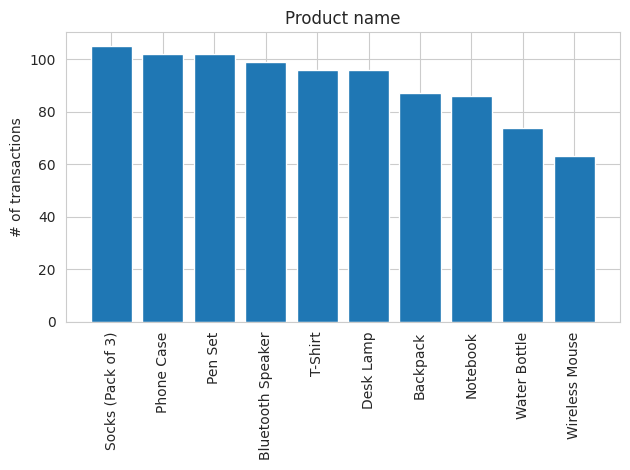

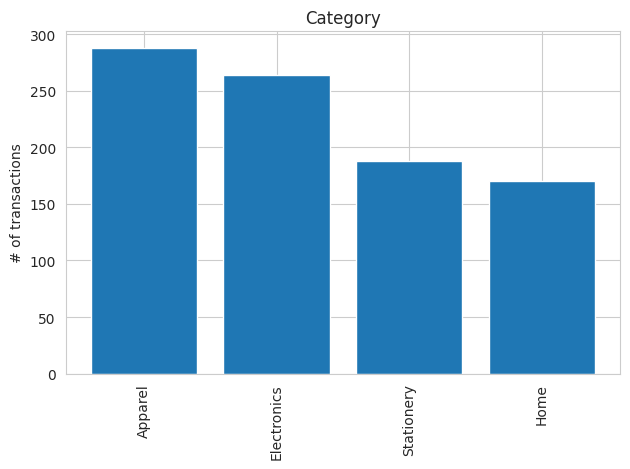

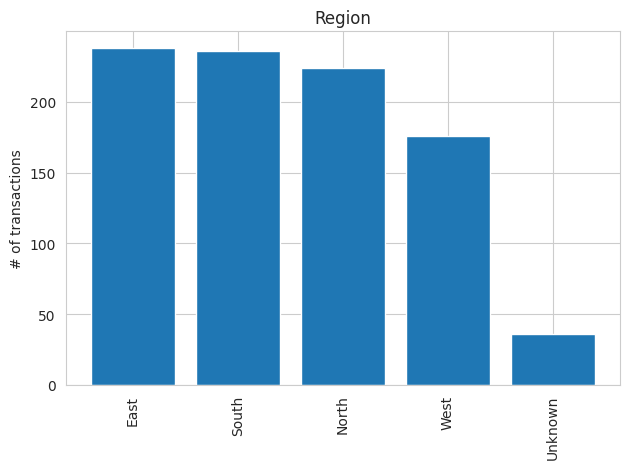

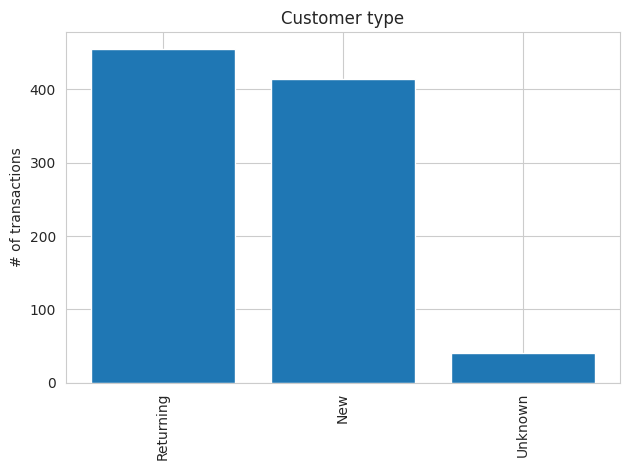

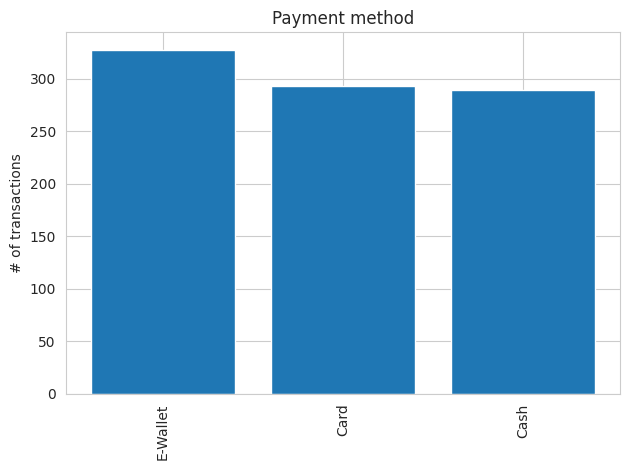

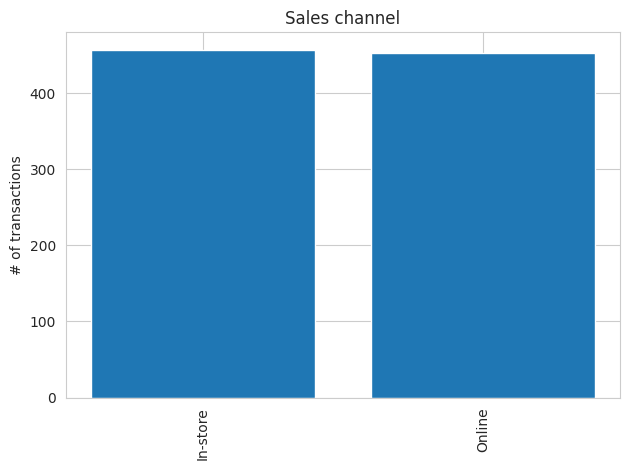

In [88]:
# Generates bar graphs for all categorical data except order id
for col in cleaned_df.describe(include="object").columns[1:]:
  plt.bar(cleaned_df[col].value_counts().index, cleaned_df[col].value_counts().values)
  plt.xticks(rotation=90)
  plt.ylabel("# of transactions")
  plt.title(col.replace("_", " ").capitalize())
  plt.tight_layout()
  plt.show()

**Top Products by Transaction Count:**

Most products have a relatively balanced share of transactions. However, Socks, Phone Case, Pen Set, Bluetooth Speaker, and T-Shirt are the top five in terms of transaction volume, suggesting they are either highly popular or low-cost/high-frequency items.

**Top Categories:**

The Apparel and Electronics categories dominate in terms of transaction count, indicating strong customer demand and product movement in these segments.

**Regional Performance (Transaction Count):**

The East region leads in total transactions, closely followed by South, then North, and West. This may reflect either larger market size, better customer reach, or stronger sales strategies in the East.

**Customer Type Distribution:**

Returning customers account for the highest number of transactions, which may indicate strong customer loyalty or a mature customer base in this dataset.

**Payment Method Preferences:**

E-wallet is the most frequently used payment method, but the gap is not wide, Card and Cash are also widely used. This suggests a diverse range of payment preferences among customers.

**Sales Channel Preferences:**

In-store and Online channels contribute nearly equally to the total number of transactions, suggesting that customers are comfortable purchasing through either channel. Both are important for maintaining overall sales volume

#### Numerical Analysis
Goal: To understand distribution, central tendency, variability, and correlation of numerical features

This step validates assumptions about the data and helps uncover skewness, outliers, or trends in metrics like sales, units sold, and profit

##### A1. Summary Statistics
Goal: To understand central tendency and variability of data

In [89]:
# Shows summary stats for categorical variables
cleaned_df.describe(include="object")

# Shows summary stats for numerical variables
cleaned_df.describe(include="number")

,units_sold,unit_price,cost_per_unit,discount,sales,total_cost,gross_profit
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,3.012088,16.054835,5.493956,0.101440,43.055945,16.406593,26.649352
std,1.440750,9.636357,4.189438,0.050765,34.820958,15.811912,19.722926
min,1.000000,4.990000,1.500000,0.000000,4.040000,1.500000,2.540000
25%,2.000000,9.990000,2.500000,0.070000,18.580000,6.000000,12.067500
50%,3.000000,11.990000,3.500000,0.100000,32.030000,10.000000,20.520000
75%,4.000000,19.990000,8.000000,0.140000,54.550000,20.000000,36.350000
max,5.000000,35.990000,15.000000,0.290000,178.150000,75.000000,103.150000


Sales and Gross Profit have high standard deviations, indicating that these metrics are quite volatile, and both are positively skewed

##### A2. Distribution Analysis
Goal: To understand distribution and normality of data using histograms

Plotting distribution for each numerical columns


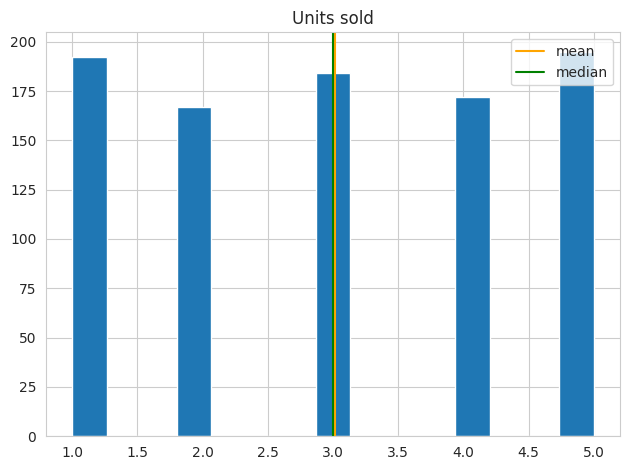

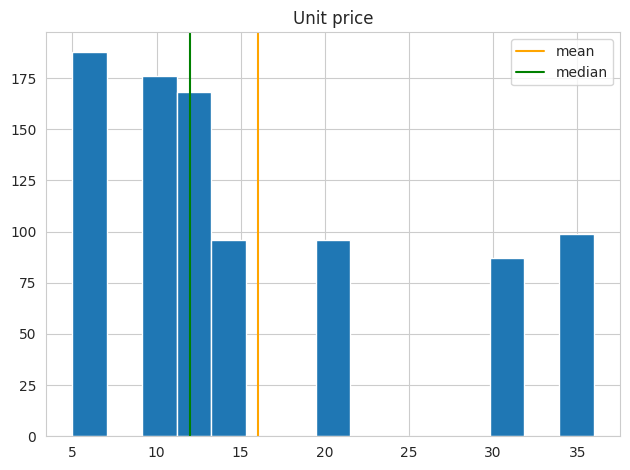

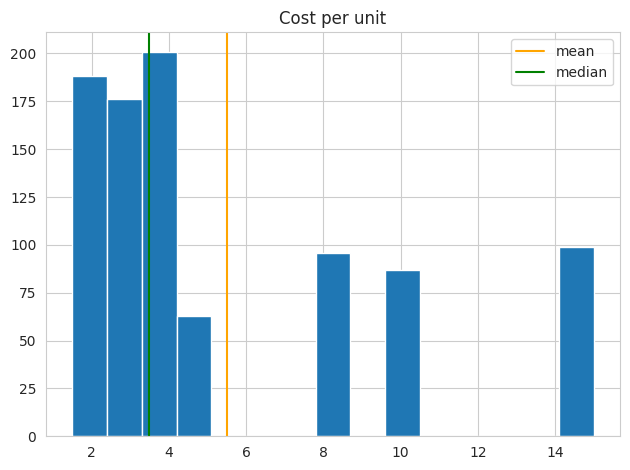

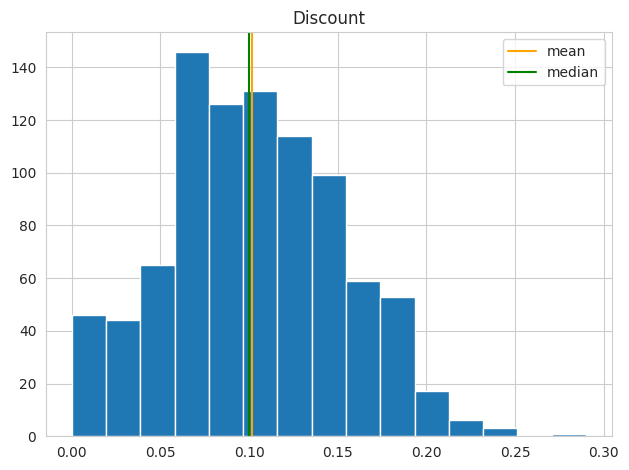

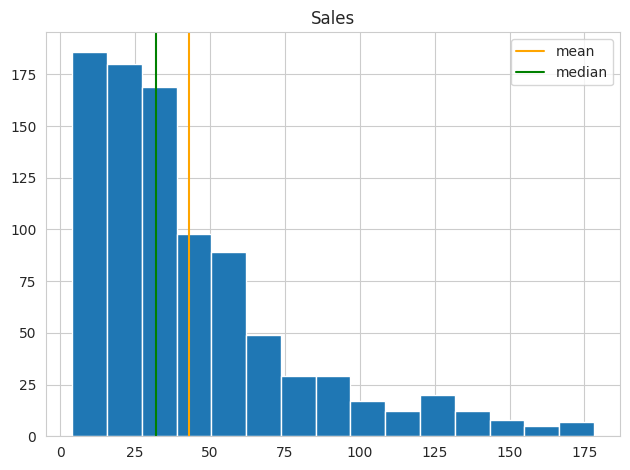

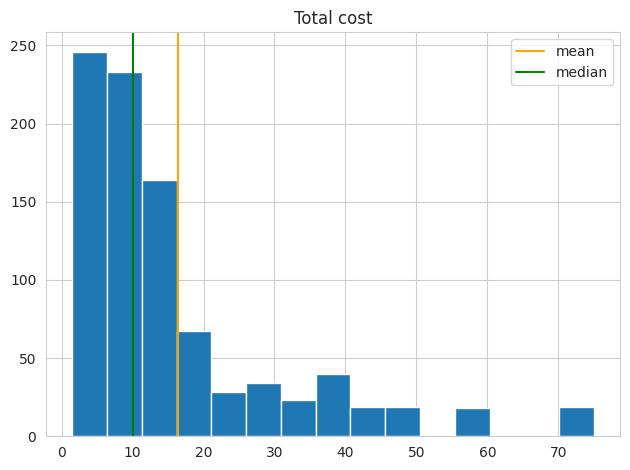

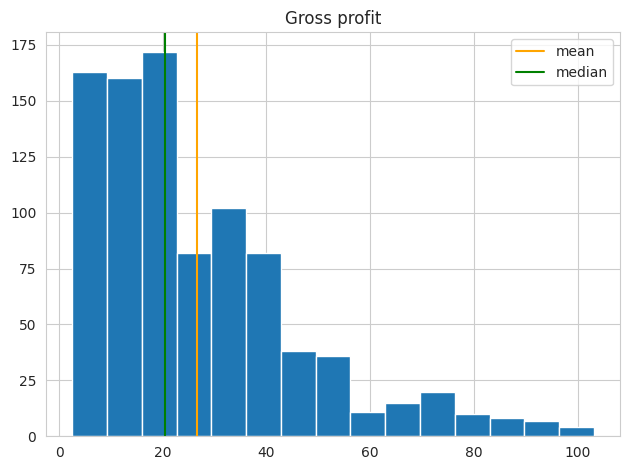

In [90]:
print("Plotting distribution for each numerical columns")
for col in cleaned_df.describe(include="number").columns:
  mean = cleaned_df[col].mean
  median = cleaned_df[col].median
  plt.hist(cleaned_df[col], bins=15)
  plt.axvline(mean(), color="orange", label="mean")
  plt.axvline(median(), color="green", label="median")
  plt.legend()
  plt.title(col.replace("_", " ").capitalize())
  plt.tight_layout()
  plt.show()


**Units Sold**

Follows a roughly normal distribution, centered around 3 units per transaction (mean = 3, std ≈ 1.4).

Approximately 68% of sales fall within 2 to 4 units.

**Discount**

The average discount applied is 10%.

Majority of discounts fall between 5% and 15%, indicating most promotions are moderate in scale.

**Unit Price**

Prices are concentrated in the \$5 to $15 range.

The full range extends from  \$5 to $35, suggesting a primarily low-cost product mix.

**Sales (Revenue)**

Revenue is right-skewed, with most transactions generating under $60.

A few high-value transactions drive up the upper range.

**Gross Profit**

Also positively skewed, with profit per transaction typically under $40.

Indicates tight margins across most sales.

##### A3. Outlier Detection
Goal: To identify valid and extreme values using Boxplots and the Interquartile Range (IQR)

Identifying outliers helps spot unusual or extreme values that may distort the analysis, highlight data entry errors, or reveal rare but impactful events (e.g., bulk orders, high-discount sales). In a retail context, this ensures our insights are based on typical customer behavior

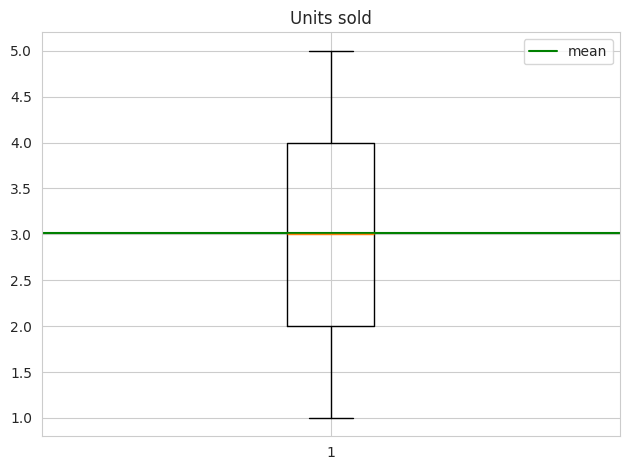

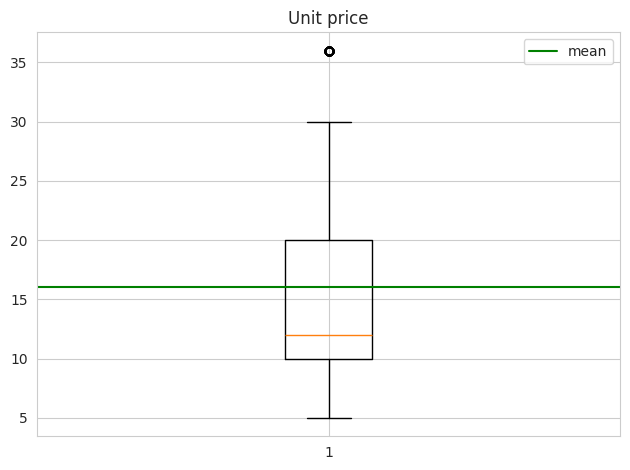

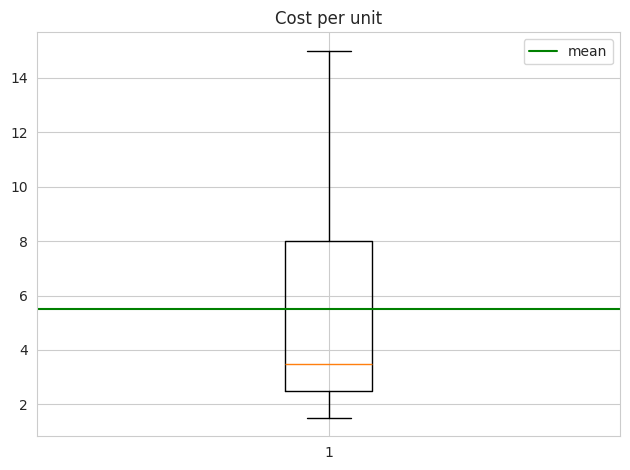

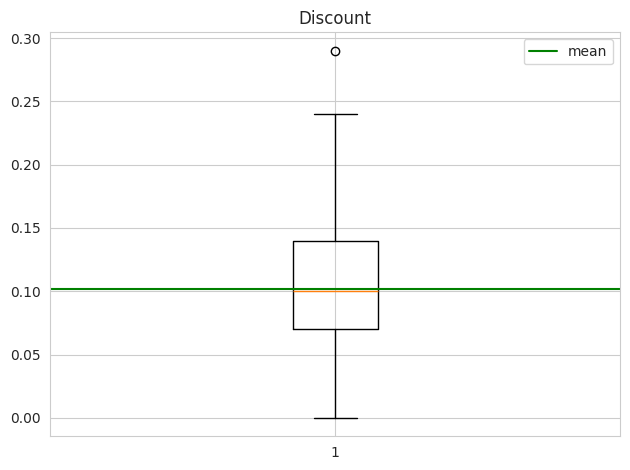

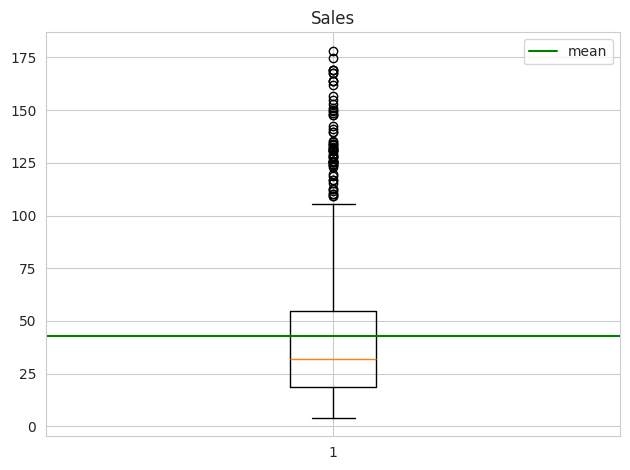

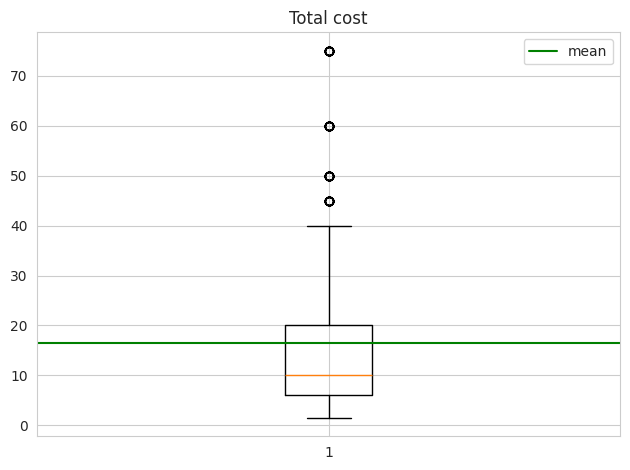

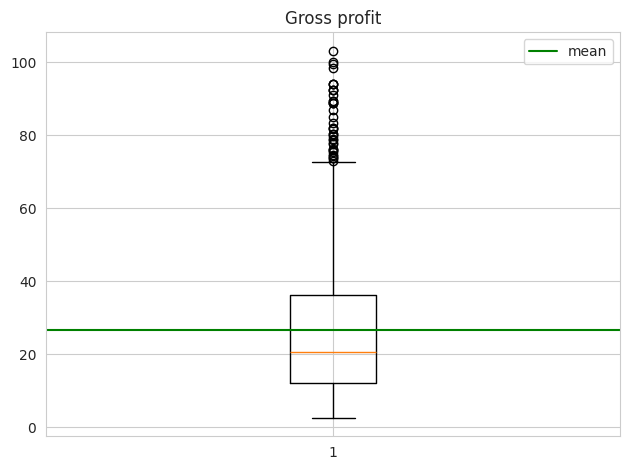

In [91]:
# Boxplot graphs
for col in cleaned_df.describe(include="number").columns:
  mean = cleaned_df[col].mean
  plt.boxplot(cleaned_df[col])
  plt.axhline(mean(), color="green", label="mean")
  plt.legend()
  plt.title(col.replace("_", " ").capitalize())
  plt.tight_layout()
  plt.show()

There are outliers in our data

So, we're going to get the number of outliers for each columns using a named function

In [92]:
from typing import List
def outlier_counter(cols_list: List[str], df: pd.DataFrame) -> pd.DataFrame:
  """
    Counts outliers and calculates the lower and upper bounds for each column in the DataFrame.

    Parameters:
    - cols_list (list): A list of column names to evaluate.
    - df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    - pd.DataFrame: A DataFrame showing the lower bound, upper bound, and outlier count for each column.
    """

  import pandas as pd
  results = {}
  for col in cols_list:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1
    lower_bound = float(round(q1-1.5*iqr, 2))
    upper_bound = float(round(q3+1.5*iqr, 2))
    outliers = df.loc[(df[col]>upper_bound)|(df[col]<lower_bound), col].count()
    results[col] = {
        "lower bound": lower_bound,
        "upper bound": upper_bound,
        "outliers": outliers}
  return pd.DataFrame(results).T

In [93]:
cols_w_outliers = ["sales", "unit_price", "discount", "sales", "total_cost", "gross_profit"]
results = outlier_counter(cols_w_outliers, cleaned_df)
print(results)

              lower bound  upper bound  outliers
sales              -35.38       108.50      64.0
unit_price          -5.01        34.99      99.0
discount            -0.04         0.25       1.0
total_cost         -15.00        41.00      75.0
gross_profit       -24.36        72.77      38.0


In [94]:
cleaned_df.loc[cleaned_df["sales"]>108.5, ["product_name", "unit_price", "units_sold", "sales"]].sample(5)

,product_name,unit_price,units_sold,sales
831,Bluetooth Speaker,35.99,4,135.32
688,Bluetooth Speaker,35.99,5,169.15
178,Bluetooth Speaker,35.99,4,116.61
402,Backpack,29.99,5,125.96
66,Bluetooth Speaker,35.99,4,131.00


The outliers in sales and gross profit are due to transactions with **higher unit prices** or **larger quantities sold** than typical.

This is expected — the units sold follow a roughly normal distribution with a mean of 3, and unit prices have a median of $11.99.

Transactions that exceed these norms are uncommon but valid, representing items or orders that differ from the usual low-cost, small-quantity nature of retail sales.

These outliers are not data errors, but natural variations in purchasing behavior.

To accurately summarize these skewed distributions, median values are more appropriate than means, as they reduce the impact of extreme values

##### A4. Correlation and Scatterplots

Goal: To identify linear relationships between numerical variables and uncover which features are most influential in driving key business metrics like sales and profit

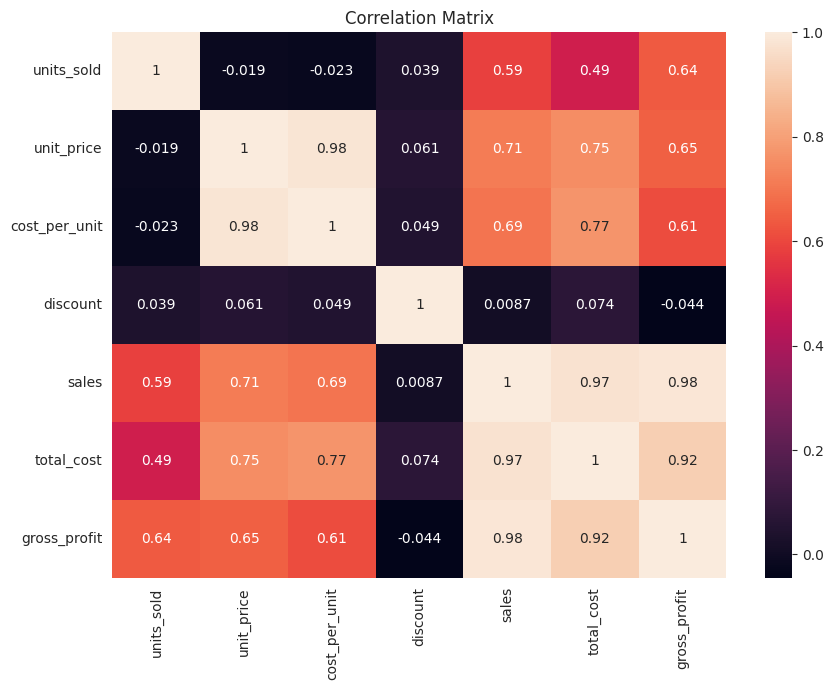

In [95]:
corr = cleaned_df[cleaned_df.describe(include="number").columns].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Key Insights:

1. Gross Profit and Sales have a very strong positive correlation (0.98), which is expected because profit is calculated from sales.

2. Units Sold and Gross Profit have a moderate correlation (0.64). While selling more units generally increases profit, the relationship is not perfectly linear due to variations in unit price and cost.

3. Unit Price and Gross Profit also show a moderate correlation (0.65). Higher-priced items typically contribute more to profit, but only if sold in reasonable volumes.

4. Discount and Units Sold have a very weak correlation (0.039), meaning that offering a discount doesn’t always increase the number of units sold.

5. Discount and Gross Profit have a very weak negative correlation (-0.044), indicating that discounts don't greatly and negatively affect gross profit, which is a good thing


## VII. Business Question Analysis

### 1.) What are the daily, weekly, and monthly sales and profits? What are the averages?
*Note: We're including median sales and profit because sales and profit data are skewed*

In [96]:
# Creating the week, month, and year columns for aggregation
cleaned_df["week"] = cleaned_df["date"].dt.isocalendar().week
cleaned_df["month"] = cleaned_df["date"].dt.month_name()
cleaned_df["year"] = cleaned_df["date"].dt.year

cleaned_df["week_end"] = cleaned_df["date"].dt.to_period("W").apply(lambda x: x.end_time).dt.date # for display in x-axis of weekly sales graph

Average Daily Sales
sales           435.343444
gross_profit    269.454556
dtype: float64

Median Daily Sales
sales           411.205
gross_profit    252.390
dtype: float64


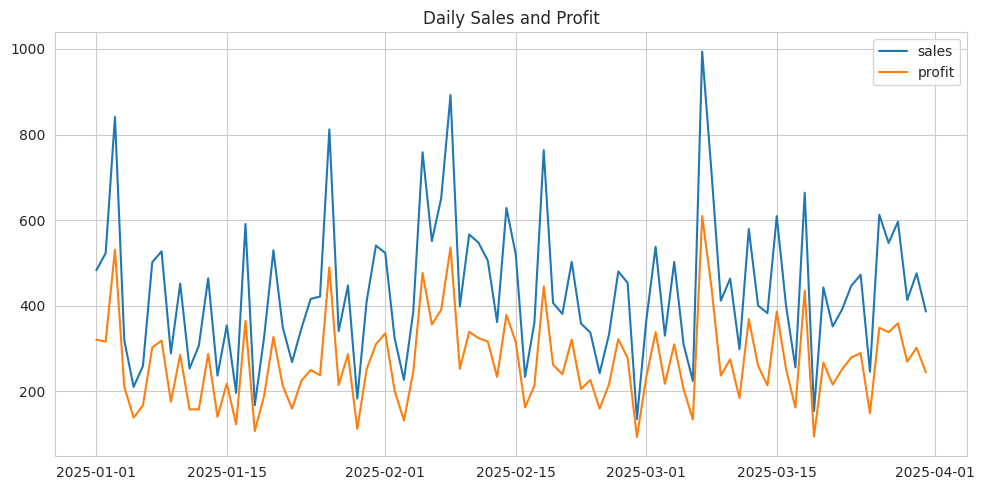


Average Weekly Sales
sales           2798.636429
gross_profit    1732.207857
dtype: float64

Median Weekly Sales
sales           2940.850
gross_profit    1808.405
dtype: float64


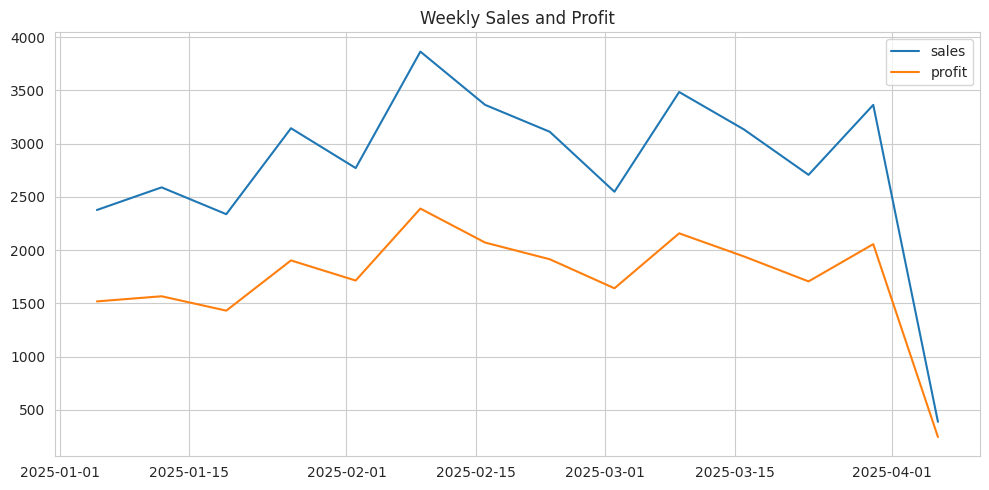

Average Monthly Sales
sales           13060.303333
gross_profit     8083.636667
dtype: float64

Median Monthly Sales
sales           12832.36
gross_profit     7981.86
dtype: float64


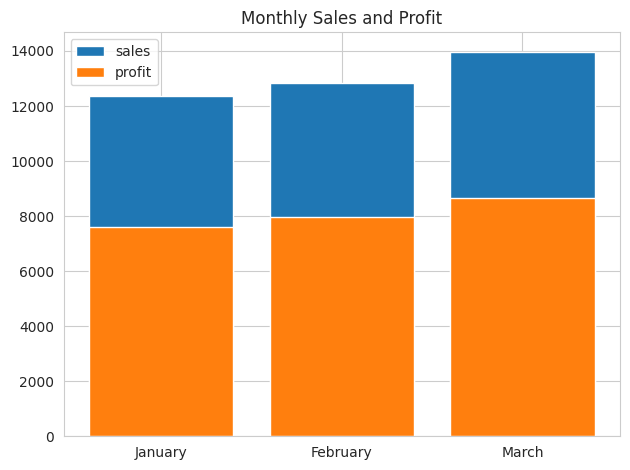

In [97]:
# Daily sales
daily_sales_profit = cleaned_df.groupby("date")[["sales", "gross_profit"]].sum()
avg_d_sales_profit = daily_sales_profit.mean()
median_d_sales_profit = daily_sales_profit.median()

print(f"Average Daily Sales\n{avg_d_sales_profit}\n")
print(f"Median Daily Sales\n{median_d_sales_profit}")

plt.figure(figsize=(10, 5))
plt.plot(daily_sales_profit.index, daily_sales_profit["sales"], label="sales")
plt.plot(daily_sales_profit.index, daily_sales_profit["gross_profit"], label="profit")
plt.title("Daily Sales and Profit")
plt.legend()
plt.tight_layout()
plt.show()


# Weekly Sales and Profit
weekly_sales_profit = cleaned_df.groupby("week_end")[["sales", "gross_profit"]].sum()
avg_w_sales_profit = weekly_sales_profit.mean()
median_w_sales_profit = weekly_sales_profit.median()

print(f"\nAverage Weekly Sales\n{avg_w_sales_profit}\n")
print(f"Median Weekly Sales\n{median_w_sales_profit}")

plt.figure(figsize=(10, 5))
plt.plot(weekly_sales_profit.index, weekly_sales_profit["sales"], label="sales")
plt.plot(weekly_sales_profit.index, weekly_sales_profit["gross_profit"], label="profit")
plt.title("Weekly Sales and Profit")
plt.legend()
plt.tight_layout()
plt.show()


# Monthly Sales and Profit
monthly_sales_profit = cleaned_df.groupby("month")[["sales", "gross_profit"]].sum()
monthly_sales_profit["month_int"] = [2, 1, 3]
monthly_sales_profit.sort_values(by="month_int", inplace=True)
monthly_sales_profit.drop(columns="month_int", inplace=True)
avg_m_sales_profit = monthly_sales_profit.mean()
median_m_sales_profit = monthly_sales_profit.median()

print(f"Average Monthly Sales\n{avg_m_sales_profit}\n")
print(f"Median Monthly Sales\n{median_m_sales_profit}")

plt.bar(monthly_sales_profit.index, monthly_sales_profit["sales"], label="sales")
plt.bar(monthly_sales_profit.index, monthly_sales_profit["gross_profit"], label="profit")
plt.title("Monthly Sales and Profit")
plt.legend()
plt.tight_layout()
plt.show()

There's a sudden drop in sales and profit in the last recorded week.

To investigate, I checked the number of transactions for that week

In [98]:
print(f'Rows: {cleaned_df.loc[cleaned_df["week"]==cleaned_df["week"].max(), "order_id"].count()}')

Rows: 6


The result shows only 6 transactions, which is significantly lower than usual. This suggests that the dataset for that week is incomplete.

To make this clearer, I visualized the weekly sales using a bar chart, which highlights the sharp drop at the end

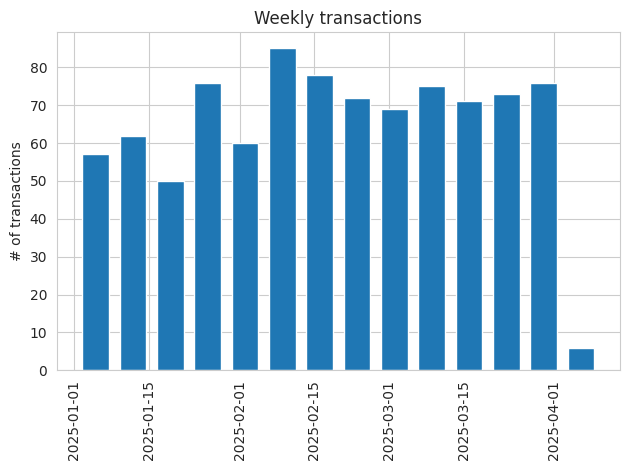

In [99]:
# Visualize # of transactions per week using a bar graph
plt.bar(cleaned_df["week_end"].value_counts().index, cleaned_df["week_end"].value_counts().values, width=5)
plt.xticks(rotation=90)
plt.ylabel("# of transactions")
plt.title("Weekly transactions")
plt.tight_layout()
plt.show()

**Insights:**

  **Daily:**

  **Avg Sales**: 435.34 |
  **Avg Profit**: 269.45

  Median Sales: 411.20 |
  Median Profit: 252.39

<br>

  **Weekly:**

  **Avg Sales**: 2798.63 |
  **Avg Profit**: 1732.20

  Median Sales: 2940.85 |
  Median Profit: 1808.40

<br>  

  **Monthly:** There is an upward trend for sales and profit each month, indicating growth and potential
  
  **Avg Sales**: 13060.30 |
  **Avg Profit**: 8083.63

  Median Sales: 12832.36 |
  Median Profit: 7981.86

### 2.) What are the top 5 products by profit/sales?
Goal: To identify the top 5 best-performing products in terms of both sales revenue and profit

This helps the business prioritize high-performing inventory.

Writing a named function that visualizes profit and sales for future visualizations

In [100]:
from typing import Optional

def profit_sale_visualizer(df: pd.DataFrame, category_col: str, sales_col: str, profit_col: str, p_c: Optional[str] = None , s_c: Optional[str] = None , agg: str="sum") -> None:
  """
    Visualizes total sales and profit by category, along with profit margins.

    Parameters:
    - df (pd.DataFrame): The dataset containing sales and profit data.
    - category_col (str): Column name to group by (e.g., product category or region).
    - sales_col (str): Column name representing sales amount.
    - profit_col (str): Column name representing profit amount.
    - p_c (str or None): Optional color for the profit bars.
    - s_c (str or None): Optional color for the sales bars.

    Displays:
    - A grouped bar chart comparing sales and profit totals by the selected category.
    - Annotated values for profit, sales, and calculated profit margin on each bar.
    """

  # Grouping sales and profit by the selected category
  sales_sum = round(df.groupby(category_col)[sales_col].agg(agg).sort_values(ascending=True), 2)
  profit_sum = round(df.groupby(category_col)[profit_col].agg(agg).sort_values(ascending=True), 2)

  # Avoid division by Zero
  margin = profit_sum / sales_sum.replace(0, 1)
  margin = margin.round(2)

  plt.figure(figsize=(9, 6))

  # Bar chart
  plt.bar(sales_sum.index, sales_sum.values, label=sales_col, color=s_c)
  plt.bar(profit_sum.index, profit_sum.values, label=profit_col, color=p_c)

  # Add value labels
  for i in range(len(margin)):
    plt.text(x=i, y=profit_sum[i], s=str(profit_sum[i]), ha="center", va="bottom")
    plt.text(x=i, y=sales_sum[i], s=str(sales_sum[i]), ha="center", va="bottom")
    plt.text(x=i, y=margin[i], s=str(margin[i]), ha="center", va="bottom")


  plt.xticks(rotation=90)
  plt.legend()
  plt.title(agg.title() +" Sales and Profit per " + category_col.replace("_", " ").title())
  plt.tight_layout()
  plt.show()

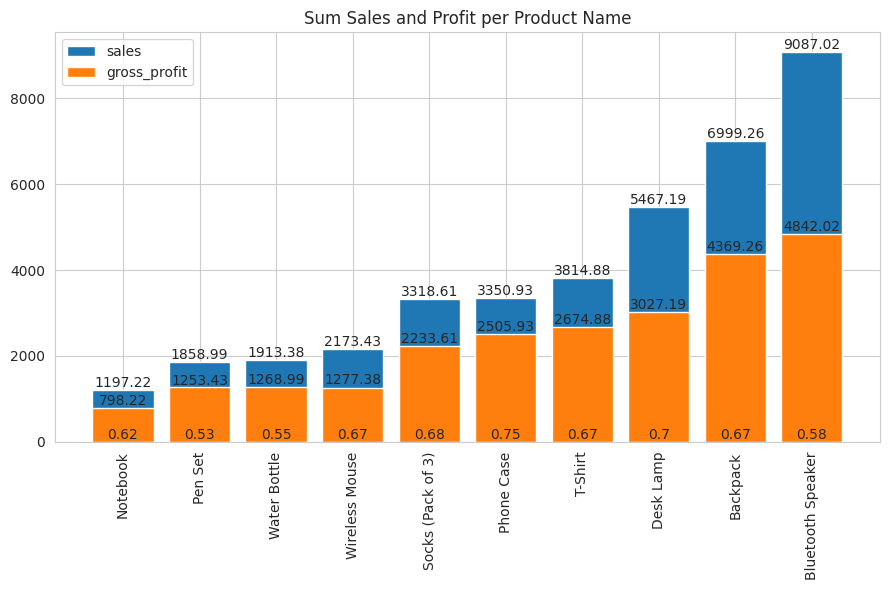

In [101]:
# visualizing the top 5 performing products
profit_sale_visualizer(cleaned_df, "product_name", "sales", "gross_profit")

Visualizing product performance over the 3-month period to assess the consistency of sales for each product

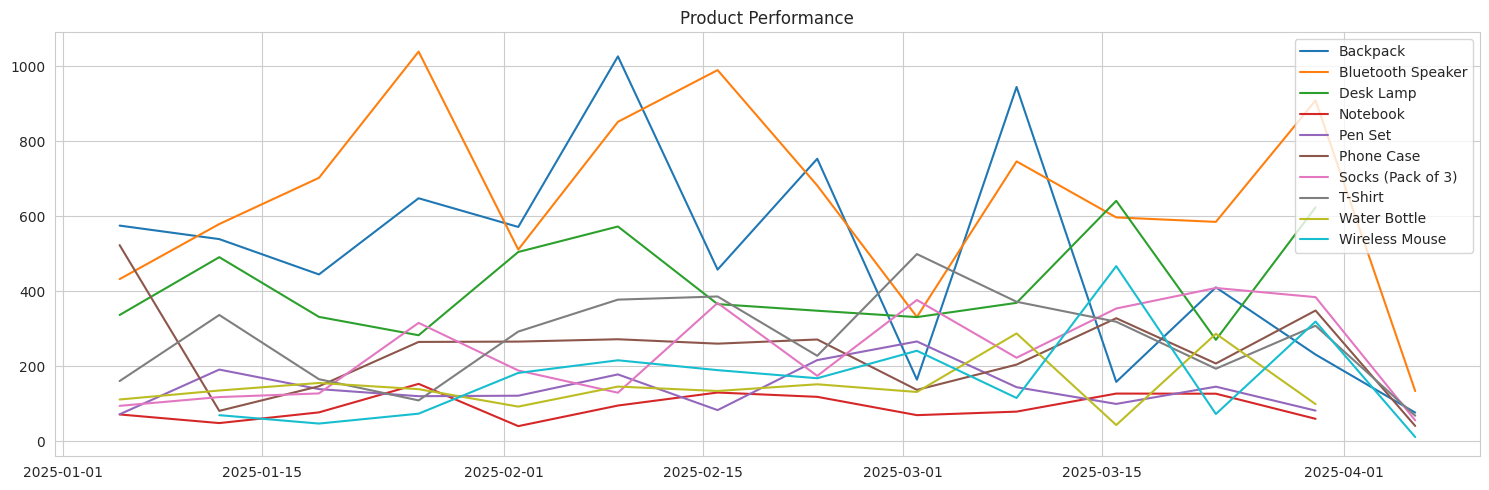

In [102]:
product_perf = cleaned_df.groupby(["week_end", "product_name"])["sales"].sum().reset_index()
plt.figure(figsize=(15, 5))
for product in product_perf["product_name"].unique():
  plt.plot(product_perf.loc[product_perf["product_name"]==product, "week_end"], product_perf.loc[product_perf["product_name"]==product,"sales"], label=product)
  plt.legend()
plt.title("Product Performance")
plt.tight_layout()
plt.show()

**Insight:**

The top 5 consistently performing products are:
1. Bluetooth Speaker
2. Backpack
3. Desk Lamp
4. T-shirt
5. Phone Case and Socks

These products show steady sales trends across weeks, indicating strong customer preference and reliability in driving revenue

### 3.) What category drives profit/revenue the most?
Goal: Identify which product categories contribute the most to sales and profit.

Understanding which categories generate the highest revenue and profit provides valuable insights into customer buying behavior. This can help prioritize inventory, marketing efforts, and strategic decisions focused on high-performing product lines.

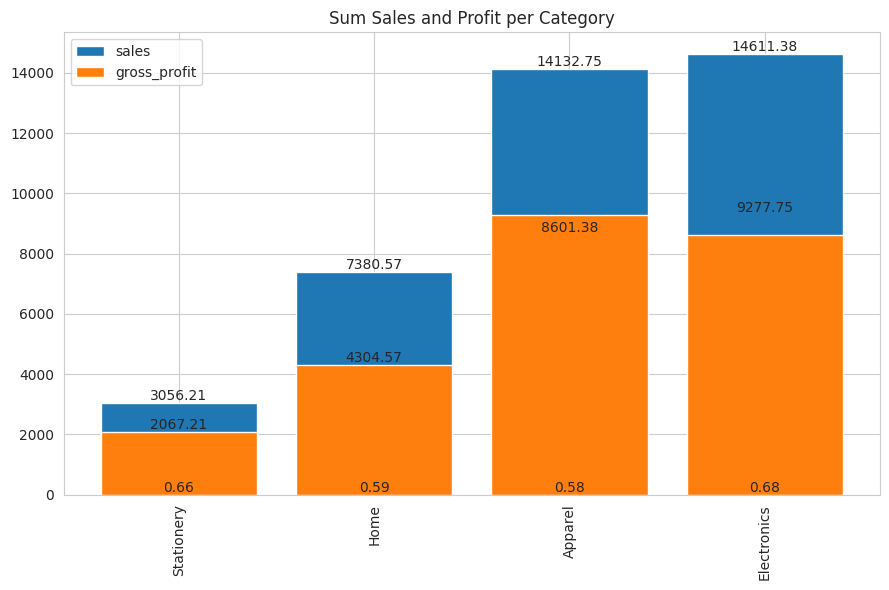

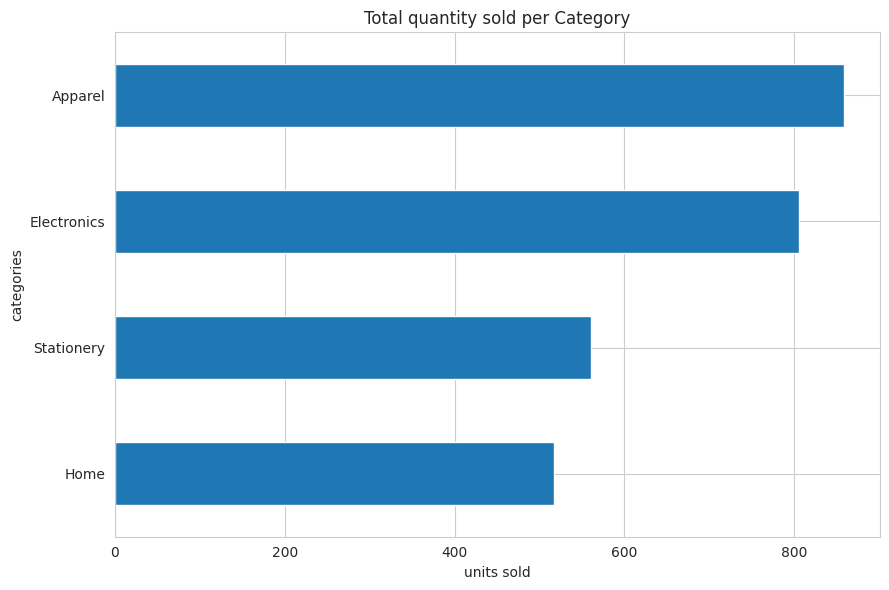

      category       product_name  unit_price  order_id
0      Apparel           Backpack       29.99        87
1      Apparel  Socks (Pack of 3)       11.99       105
2      Apparel            T-Shirt       14.99        96
3  Electronics  Bluetooth Speaker       35.99        99
4  Electronics         Phone Case       10.99       102
5  Electronics     Wireless Mouse       12.99        63
6         Home          Desk Lamp       19.99        96
7         Home       Water Bottle        9.99        74
8   Stationery           Notebook        4.99        86
9   Stationery            Pen Set        6.99       102


In [103]:
profit_sale_visualizer(cleaned_df, "category", "sales", "gross_profit")

units_group = cleaned_df.groupby("category")["units_sold"].sum().sort_values(ascending=True)
plt.figure(figsize=(9, 6))
units_group.plot(kind="barh")
plt.xlabel("units sold")
plt.ylabel("categories")
plt.title("Total quantity sold per Category")
plt.tight_layout()
plt.show()

print(cleaned_df.groupby(["category", "product_name", "unit_price"])["order_id"].count().reset_index())

**Insights:**

In addition to revenue and profit, we analyzed total units sold per category to understand actual demand volume which is a critical factor for inventory planning and supply chain decisions

* **Electronics** and **Apparel** generate the **highest revenue** (higher total transactions and higher unit price)
* On the other hand, **Apparel** leads in **total quantity sold**, suggesting it is a high-turnover category.

This insight helps retailers balance between high-value (profit-driven) and high-volume (demand-driven) inventory strategies

### 4.) Does discounts increase profit/units sold?
Goal: To assess whether applying discounts leads to an increase in units sold or impacts gross profit positively or negatively

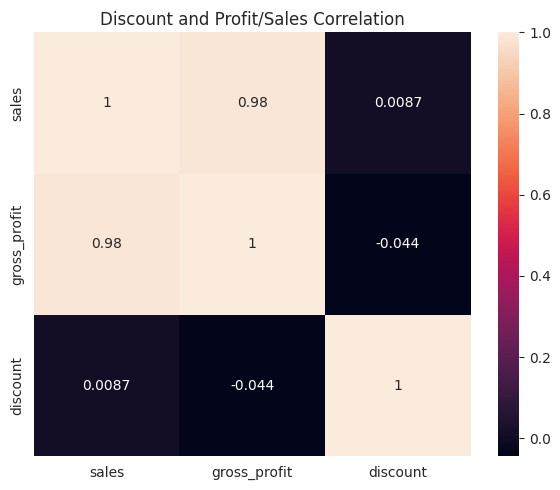

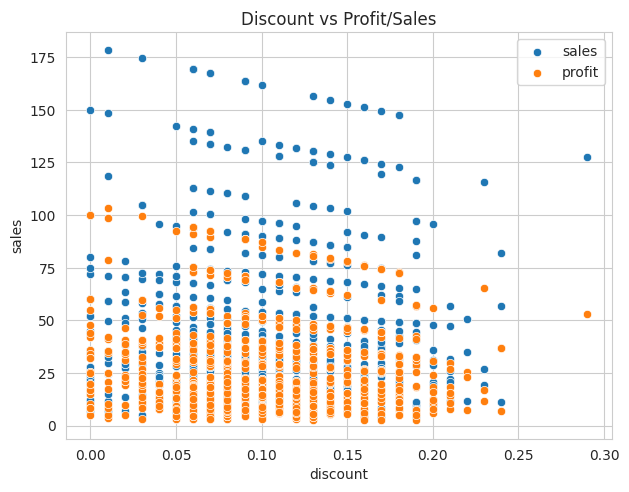

In [104]:
corr = cleaned_df[["sales", "gross_profit", "discount"]].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True)
plt.title("Discount and Profit/Sales Correlation")
plt.tight_layout()
plt.show()


sns.scatterplot(x=cleaned_df["discount"], y=cleaned_df["sales"], label="sales")
sns.scatterplot(x=cleaned_df["discount"], y=cleaned_df["gross_profit"], label="profit")
plt.legend()
plt.tight_layout()
plt.title("Discount vs Profit/Sales")
plt.show()

The correlation matrix shows that:

* Sales have a very weak positive correlation with discount (r = 0.009)
* Gross profit has a very weak negative correlation with discount (r = -0.044)

These results indicate that there is no significant linear relationship between discount and either sales or gross profit.

Additionally, the scatterplot reveals a wide dispersion of values without a clear upward or downward trend, reinforcing the idea that offering discounts does not meaningfully influence transaction-level revenue or profit.

To validate whether offering discounts influences customer behavior, two tests were performed:

* **Welch’s t-test** on units_sold, to compare means between discounted and non-discounted groups (data is approximately normal).

* **Mann-Whitney U test** on sales and gross_profit, to compare distributions without assuming normality.

In [105]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

with_discount = cleaned_df[cleaned_df["discount"] > 0][["sales", "gross_profit", "units_sold"]]
no_discount = cleaned_df[cleaned_df["discount"] == 0][["sales", "gross_profit", "units_sold"]]

# Welch's T-test for units sold
print("units_sold")
t_stat, p_value = ttest_ind(with_discount["units_sold"], no_discount["units_sold"], equal_var=False)
print(f"Units sold t-stat: {t_stat}")
print(f"Units sold p-value: {p_value}\n")

# Mann-Whitney U test for Sales and Profit
for col in with_discount.columns[:-1]:
  stat, p_value = mannwhitneyu(with_discount[col], no_discount[col], alternative='two-sided')
  print(col)
  print(f"{col} u-stat: {stat}")
  print(f"{col} p-value: {p_value}\n")


units_sold
Units sold t-stat: -1.1121280474204855
Units sold p-value: 0.274632102299114

sales
sales u-stat: 13075.0
sales p-value: 0.9299221895696033

gross_profit
gross_profit u-stat: 12388.0
gross_profit p-value: 0.5664975897487687



Test results:

1. Units Sold: t-stat = -1.11, p-value = 0.27

2. Sales: U-stat = 13075.0, p-value = 0.93

3. Gross Profit: U-stat = 12388.0, p-value = 0.56

All **p-values are greater than 0.05**, meaning the observed differences are not statistically significant

**Insight:**

Both the correlation analysis,Welch’s t-test, and Mann-Whitney U test indicate that offering discounts **does not have a statistically significant** impact on sales, units sold, or gross profit.

### 5.) What region has the leading revenue/profit? on average?
Goal: To identify which region performs best in terms of total and average sales and profit

This helps target high-performing regions and spot those needing support or improvement

*Note: Sales and Profit data are skewed, so we're including the median*

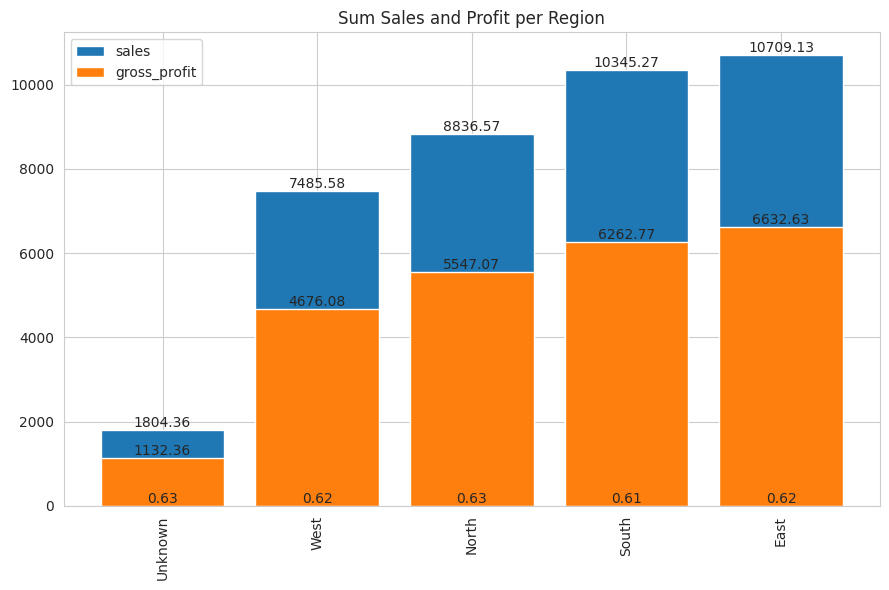

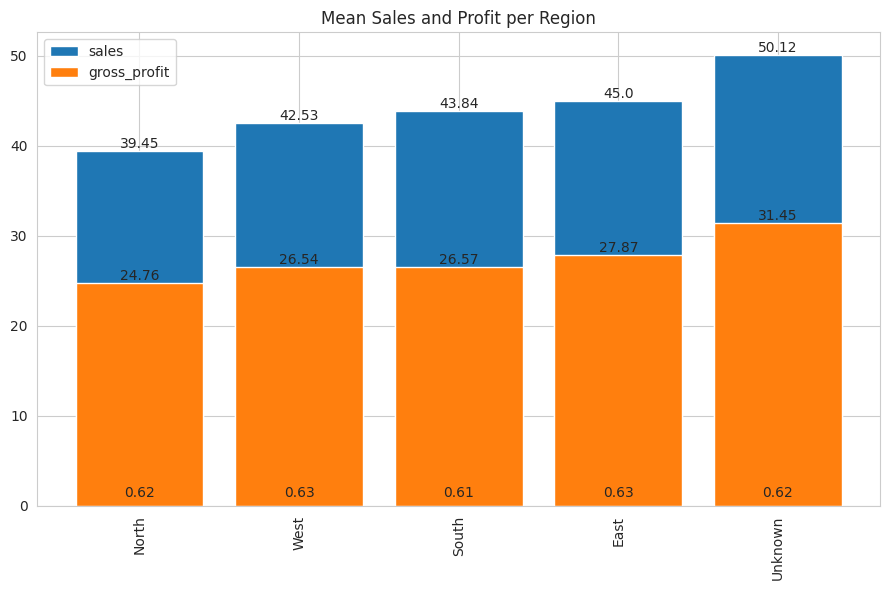

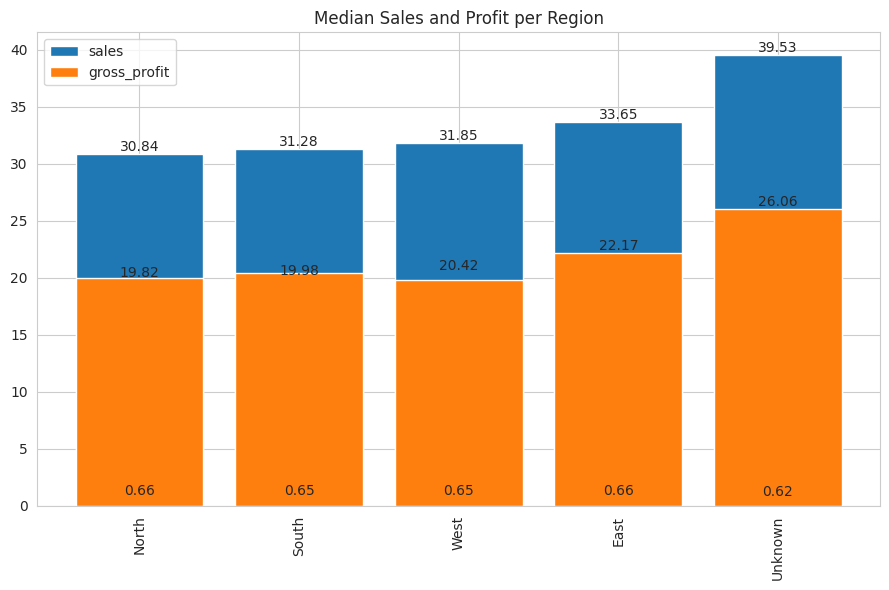

In [106]:
profit_sale_visualizer(cleaned_df, "region", "sales", "gross_profit")
profit_sale_visualizer(cleaned_df, "region", "sales", "gross_profit", agg="mean")
profit_sale_visualizer(cleaned_df, "region", "sales", "gross_profit", agg="median")

**Insight:**

The **East** region has the **highest total sales (\$10,709.13)** and the **highest average sales per transaction (\$45)**, excluding the "Unknown" region. South and West regions also contribute significantly to overall revenue performance, including the North region with average sales between \$39 and \$43.

However, due to the right-skewed distribution of sales, average values may be influenced by a few high-value transactions. **Median sales** provides a **more balanced view**, with all regions falling between **\$30** and **\$33**, supporting the same regional ranking but offering a more accurate measure of typical transaction value.

The East’s higher sales primarily driven by a higher number of transactions, indicating a larger customer base and potentially greater market penetration

### 6.) What region has higher New customers? and Returning customer?
Goal: To identify which regions have higher volumes of New and Returning customers.

This insight helps determine which regions show strong potential for converting New customers into Returning ones, which can drive long-term sales growth and business stability

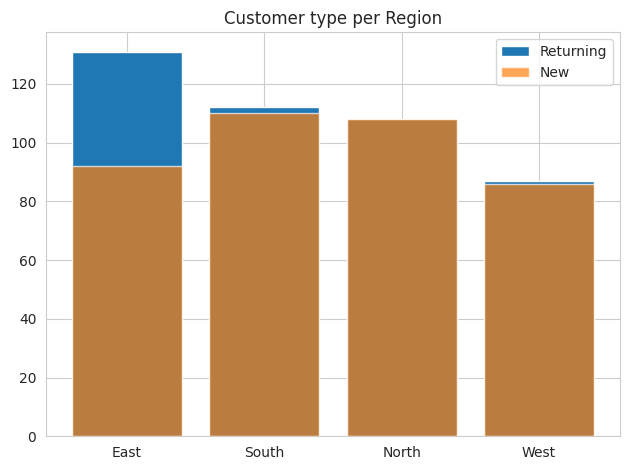

customer_type  New  Returning
region                       
East            92        131
South          110        112
North          108        108
West            86         87


In [107]:
customer_type_region = cleaned_df.groupby("region")["customer_type"].value_counts().reset_index().sort_values(by="count", ascending=False)
pivot_c_type_region = customer_type_region[(customer_type_region["customer_type"]!="Unknown") & (customer_type_region["region"]!="Unknown")].sort_values(by="region").pivot(index="region", columns="customer_type", values="count").sort_values(by="Returning", ascending=False)

plt.bar(pivot_c_type_region.index, pivot_c_type_region["Returning"], label="Returning")
plt.bar(pivot_c_type_region.index, pivot_c_type_region["New"], label="New", alpha=.7)
plt.legend()
plt.title("Customer type per Region")
plt.tight_layout()
plt.show()

print(pivot_c_type_region)


**Insight:**

The **East region** has the highest number of **Returning customers** (131), but a **lower number of New customers** (92) compared to other regions.

In contrast, **North, South**, and **West** regions show nearly equal numbers of New and Returning customers, suggesting a **balanced inflow and retention**

<br>

This pattern in the East could imply:

* A **strong customer retention strategy** that quickly converts new buyers into repeat customers, or

* **Lower new customer acquisition**, possibly due to **market saturation** or **strong regional competition** limiting growth potential

### 7.) How much revenue/profit does each customer type generates on average?
Goal:
To determine which customer type (New, Returning) contributes more to revenue and profit per transaction on average.


This helps identify high-value customer segments, allowing the business to focus marketing and retention strategies on the most profitable customer types

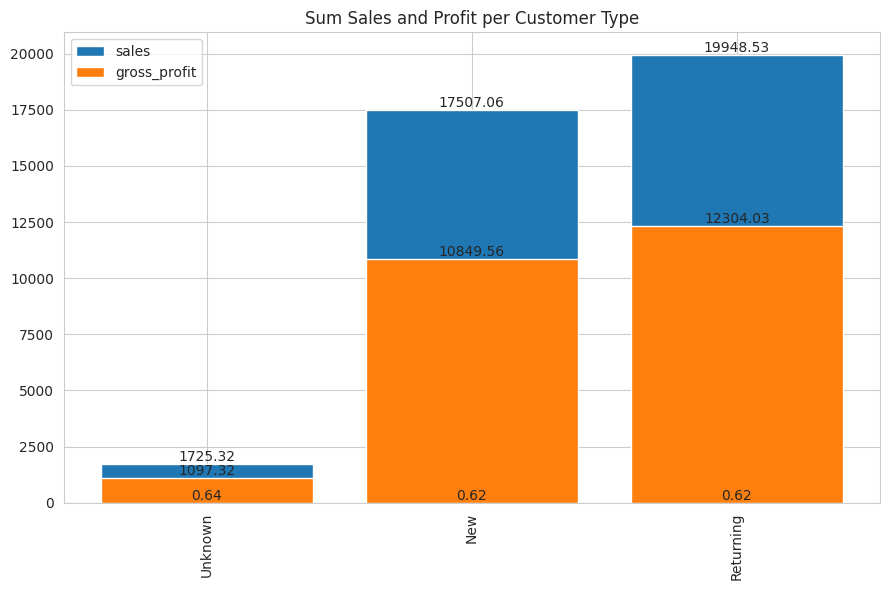

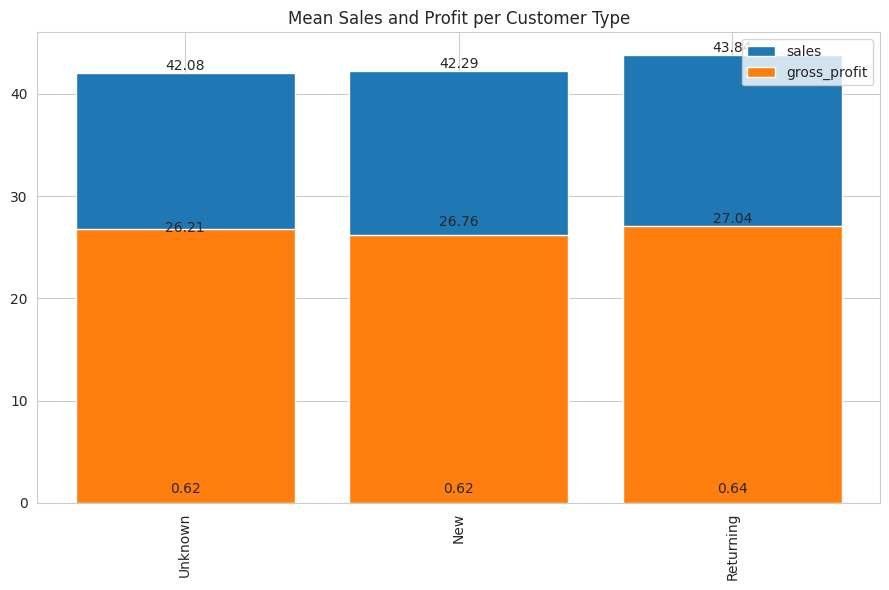

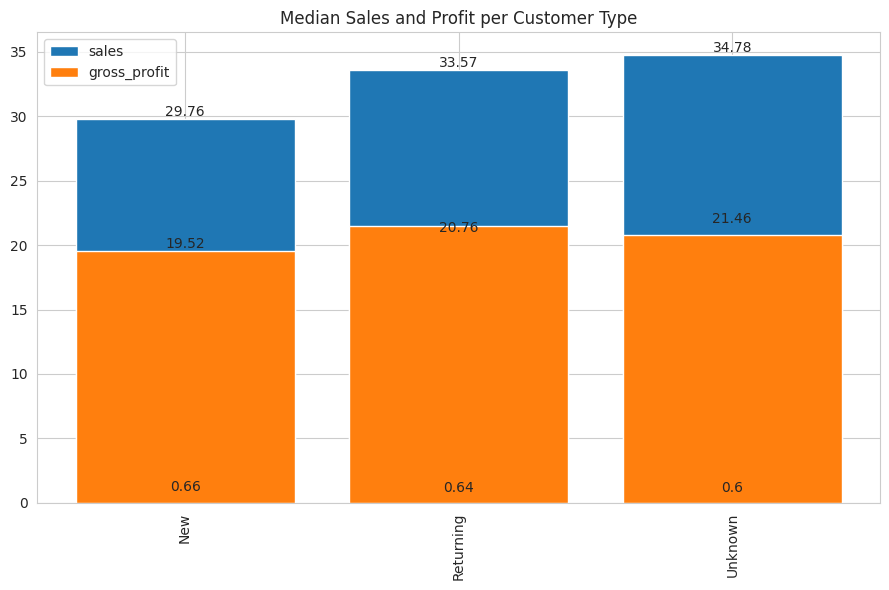

In [108]:
profit_sale_visualizer(cleaned_df, "customer_type", "sales", "gross_profit")
profit_sale_visualizer(cleaned_df, "customer_type", "sales", "gross_profit", agg="mean")
profit_sale_visualizer(cleaned_df, "customer_type", "sales", "gross_profit", agg="median")

**Insights:**

Returning customers generate **more total sales and profit** due to their higher transaction count.

On a per-transaction basis, **Returning customers have a median sale of \$33.50**, slightly higher than **\$29.70 for New customers**.

While **New customers show a slightly higher profit margin (66%)** than Returning (64%), the **difference is minimal** and may not be practically significant.

Focusing on **retaining New customers** to turn them into **Returning customers** can enhance both **sales volume** and **long-term business stability**

### 8.) What payment method is mostly used by customers?
Goal: To identify the most preferred payment methods among customers.

This insight can guide which payment options to optimize, promote, or expand, helping improve customer experience and reduce transaction-related friction

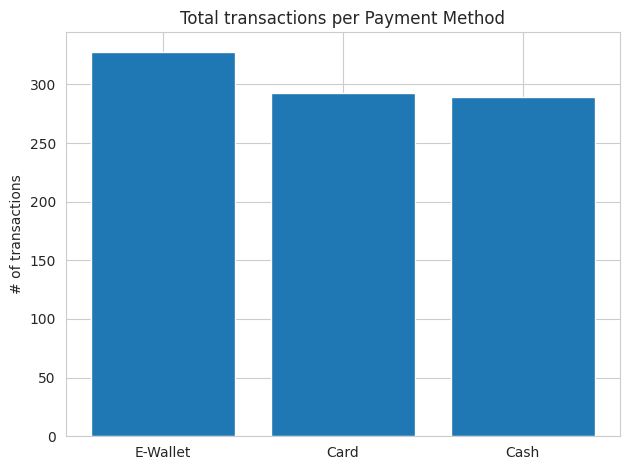

In [109]:
plt.bar(cleaned_df["payment_method"].value_counts().index, cleaned_df["payment_method"].value_counts().values)
plt.ylabel("# of transactions")
plt.title("Total transactions per Payment Method")
plt.tight_layout()
plt.show()

**Insights:**

**E-Wallet** is the most used payment method among customers, even though **In-Store** and **Online** channels have nearly the same number of transactions. This indicates that E-Wallets are a **widely preferred** payment method across both channels.

While **Card** and **Cash** are still frequently used, **ensuring the reliability and ease** of E-Wallet transactions is important to maintain customer satisfaction and prevent disruptions at checkout

### 9.) What do customers prefer? in-store or online? and what generates higher revenue/profit?
Goal: To compare sales performance between In-store and Online sales channels

This helps understand customer channel preference and identify which channel contributes more to revenue and profitability, guiding future investment and marketing strategies

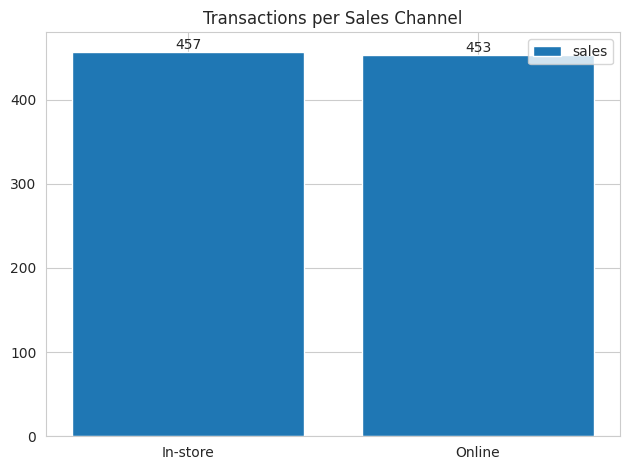

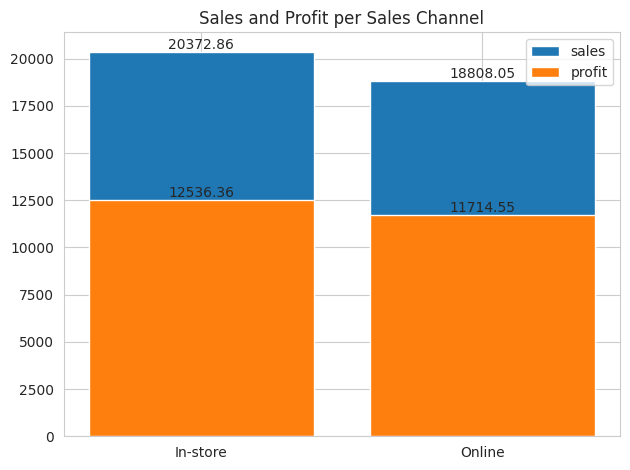

In [110]:
channel_sales = cleaned_df.groupby("sales_channel")[["sales", "gross_profit"]].sum().reset_index()
channel_volume = cleaned_df.groupby("sales_channel")["order_id"].count().reset_index()

plt.bar(channel_volume["sales_channel"], channel_volume["order_id"], label="sales")
for i in range(len(channel_volume)):
    plt.text(x=i, y=channel_volume.loc[i, "order_id"], s=str(channel_volume.loc[i, "order_id"]), ha="center", va="bottom")
plt.legend()
plt.title("Transactions per Sales Channel")
plt.tight_layout()
plt.show()


plt.bar(channel_sales["sales_channel"], channel_sales["sales"], label="sales")
plt.bar(channel_sales["sales_channel"], channel_sales["gross_profit"], label="profit")
for i in range(len(channel_sales)):
    plt.text(x=i, y=channel_sales.loc[i, "sales"], s=str(channel_sales.loc[i, "sales"]), ha="center", va="bottom")
    plt.text(x=i, y=channel_sales.loc[i, "gross_profit"], s=str(channel_sales.loc[i, "gross_profit"]), ha="center", va="bottom")
plt.legend()
plt.title("Sales and Profit per Sales Channel")
plt.tight_layout()
plt.show()


**Insights:**

The **In-store** and **Online** channels have nearly the same number of transactions, with In-store at **457** and Online at **453**, indicating a balanced customer preference between the two

However, **In-store** generates **higher total sales (\$20,372)** and **gross profit** compared to **Online (\$18,808)**

This suggests that while customers shop equally across both channels, **In-store transactions** tend to be of **higher value**, possibly due to **upselling, impulse buying, or bulk purchases** that are more common in physical locations

That said, we **cannot confirm whether this difference is statistically significant** without conducting a hypothesis test

### 10.) What categories are popular to customers for in-store and online sales channel?
Goal: To understand which product categories perform best in each sales channel (In-store vs Online).

This insight can guide channel-specific marketing, inventory allocation, and sales strategy

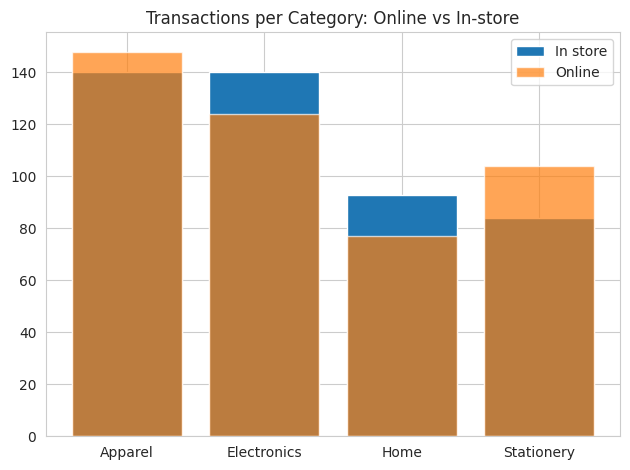

sales_channel     category  In-store  Online  total
0                  Apparel       140     148    288
1              Electronics       140     124    264
2                     Home        93      77    170
3               Stationery        84     104    188


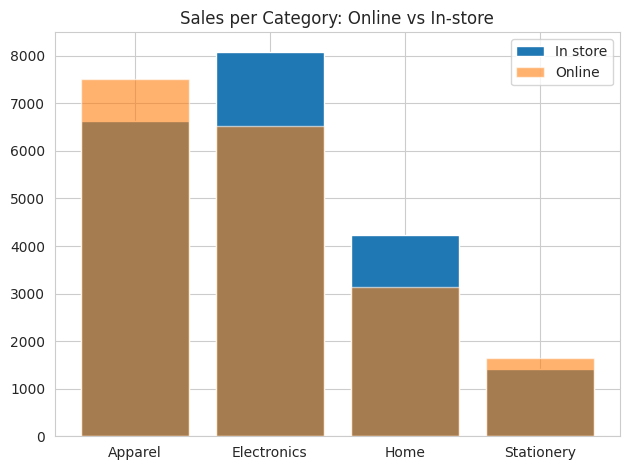

sales_channel     category  In-store   Online     total
0                  Apparel   6627.42  7505.33  14132.75
1              Electronics   8089.45  6521.93  14611.38
2                     Home   4235.88  3144.69   7380.57
3               Stationery   1420.11  1636.10   3056.21


In [111]:
cat_channel_count = cleaned_df.groupby(["sales_channel", "category"])["order_id"].count().reset_index().pivot(index="category", columns="sales_channel", values="order_id").reset_index()

plt.bar(cat_channel_count["category"], cat_channel_count["In-store"], label="In store")
plt.bar(cat_channel_count["category"], cat_channel_count["Online"], label="Online", alpha=.7)
plt.legend()
plt.title("Transactions per Category: Online vs In-store")
plt.tight_layout()
plt.show()

cat_channel_count["total"] = cat_channel_count["In-store"] + cat_channel_count["Online"]
print(cat_channel_count)

cat_channel_count = cleaned_df.groupby(["sales_channel", "category"])["sales"].sum().reset_index().pivot(index="category", columns="sales_channel", values="sales").reset_index()

plt.bar(cat_channel_count["category"], cat_channel_count["In-store"], label="In store")
plt.bar(cat_channel_count["category"], cat_channel_count["Online"], label="Online", alpha=.6)
plt.legend()
plt.title("Sales per Category: Online vs In-store")
plt.tight_layout()
plt.show()

cat_channel_count["total"] = cat_channel_count["In-store"] + cat_channel_count["Online"]
print(cat_channel_count)

**Insights:**
* **Apparel and Electronics** lead in **In-store transactions**, each with 140 sales, while **Apparel surpasses Electronics in Online transactions** (148 vs. 124).

* In the **Online channel, Stationery** outperforms **Home** in transaction volume (104 vs. 77), while the reverse is true for **In-store** (Home: 93, Stationery: 84).

In terms of revenue:

* **Electronics** leads in **In-store sales** (\$8,089), followed by **Apparel** (\$6,627).

* **Online, Apparel** takes the lead with **\$7,505**, ahead of **Electronics** (\$6,521).

Overall, **Apparel and Electronics contribute over 70% of total revenue**, making them the most critical categories across both sales channels.


## VIII. Summary of Findings
**Revenue & Profit Trends**

* Sales and profit generally increase over time, though a drop in the final week suggests incomplete data.

* Daily and weekly sales exhibit seasonality, useful for forecasting and promotions.

**Top Products by Performance**

* Bluetooth Speaker, Backpack, and Desk Lamp are consistent revenue drivers.

* These products maintain strong weekly sales, indicating customer preference.

**High-Performing Categories**

* Electronics and Apparel contribute over 70% of total revenue.

* Apparel leads in total units sold, highlighting high turnover and strong demand.

**Discount Analysis**

* Discounts show no significant impact on sales, gross profit, or units sold

* This conclusion is supported by correlation analysis, Welch’s t-test, and the Mann-Whitney U test, all indicating no statistically significant effect

**Regional Performance**

* East region leads in total and average sales, likely due to a larger customer base.

* Suggests greater market penetration compared to other regions.

**Customer Type Distribution**

* East has more Returning than New customers, unlike other regions which are more balanced.

* Indicates strong retention or market saturation in East.

**Customer Type Value**

* Returning customers generate more total and median sales, but New customers yield slightly better profit margins.

* Emphasizes the importance of converting New customers into Returning ones.

**Payment Method Preference**

* E-Wallet is the most used method, likely due to ease of use.

* Card and Cash are still widely used, suggesting varied preferences.

**Sales Channel Insights**

* In-store and Online have equal transaction volume, but In-store leads in revenue and profit.

* Indicates higher value purchases or upselling in physical stores.

**Channel-Category Popularity**

* Apparel dominates online sales, while Electronics leads in-store.

* Understanding channel-specific category demand is key for targeted strategies

## IX. Business Recommendations

### Sales & Profit
**Sustain Operational Growth**
* Monthly sales growth indicates strong performance and market demand. Maintain the same level of operational efficiency to support continued growth.

**Product Bundling Opportunities**
* Target consistent top-performing products (Bluetooth Speaker, Backpack, Desk Lamp, T-shirt, Phone Case, and Socks) for bundling and promotional packages to increase basket size.

**Strategic Discounting**
* Avoid blanket discounting strategies. Since discounts show no significant impact on sales, gross profit, or units sold, test personalized or seasonal offers instead for better ROI

<br>

### Inventory Management
**Optimize Inventory Allocation**
* Increase space allocation for Electronics and Apparel (the top revenue-generating categories), if current storage is equally distributed.

**Ensure Stock Availability**
* Prioritize restocking for Electronics and Apparel, especially high-turnover products. Prevent stockouts by setting reorder thresholds using EOQ (Economic Order Quantity) principles

<br>

### Customer Behavior & Engagement
**Enhance Payment Experience**
* As E-Wallet is the most used method, ensure seamless functionality to support convenience and reduce cart abandonment.

**Improve Customer Tracking**
* Implement customer_id tracking to unlock deeper insights like conversion rates, retention, and customer lifetime value (CLV).

**Drive Repeat Purchases**
* Returning customers contribute more total sales and slightly higher median transaction value. Implement loyalty programs or personalized follow-ups to convert more New customers into Returning ones.

## X. Limitations and Considerations

**Lack of Customer Identifiers:**
* The absence of customer IDs prevents tracking individual behavior over time (e.g., conversions, customer lifetime value, retention patterns). It also limits cohort and churn analysis.

**No Foot/Web Traffic Data:**
* Without foot traffic (for in-store) or web session data (for online), it’s impossible to calculate conversion rates, making it difficult to assess the performance of marketing channels or store visits.

**Simulated Data:**
* Since the data is artificially generated, patterns observed may not accurately reflect real-world customer or market behavior. Caution should be taken when generalizing these insights.

**Sales Data Skewness:**
* Sales and profit are positively skewed. Medians were used for central tendency to reduce distortion and Mann-Whitney U test for comparing independent groups. Removing outliers was avoided to preserve data integrity, but alternatives such as Winsorization, fence-based replacement, or trimming (e.g., top/bottom 5%) can be explored to improve robustness in future analyses.

**Missing External Factors:**
* Variables such as seasonality, promotions, competitor pricing, economic conditions, or marketing spend are not included, which limits contextual understanding of sales behavior.

**Short Time Frame:**
* The 3-month period is relatively short for identifying strong trends or seasonal patterns, particularly for time series modeling or forecasting.

**Limited Product Variety:**
* Only 10 products are present in the dataset, which is far fewer than a typical retail business. This constrains analysis on product diversity and long-tail sales.

**No Store/Branch-Level Data:**
* Regional data is available, but without information about specific branches or stores, it is not possible to assess store-level performance or variations within regions.


## XI. Further Analysis Suggestions

**Explore Non-linear Relationships**
* Are there interaction effects or non-linear relationships not captured by basic correlation analysis? Consider using decision trees or regression with interaction terms.

**Analyze Weekly Trends by Weekday**
* Investigate sales and profit trends per weekday. Identifying peak sales days can support staffing, inventory, and marketing timing.

**Track In-store Foot Traffic Trends** *(if data is available)*
* Helps evaluate store performance across time and regions. Can be broken down by date, weekday, week, month, and region.

**Monitor Region's Sales Trend Over Time**
* Is each region's sales still growing, or has it plateaued? A time-based breakdown can reveal if the market is saturated or still expanding.

**Investigate the East Region’s New vs Returning Customer Imbalance**
* Perform further analysis to determine why new customer acquisition is lower in the East compared to other regions.

**Forecast Daily and Weekly Sales**
* Use ARIMA or other time series models to forecast short-term sales and profit trends for proactive business planning.

**Test for Significant Differences in Sales/Profit by Region and Category**
* Perform ANOVA or Kruskal-Wallis tests to determine if the observed differences across regions or categories are statistically significant.

**Retail Foot Traffic Conversion Rate** *(if data is available)*
* Calculate the ratio of in-store visitors to those who made purchases to evaluate store effectiveness and improve conversion.

## XII. Saving Data

### To Excel File
```
save_file_path = "/content/drive/MyDrive/Projects/data_source_files/cleaned_retail_sales_data.xlsx"
cleaned_df.to_excel(save_file_path, index=False)
```
### To Google Sheets
*Note: For using google sheets as a data pipeline to Google Looker Studio*



```
!pip install --upgrade gspread gspread_dataframe google-auth

from google.colab import auth
auth.authenticate_user()


import gspread
from google.auth import default
from gspread_dataframe import set_with_dataframe

# Get credentials
creds, _ = default()

# Authorize gspread client
gc = gspread.authorize(creds)


spreadsheet = gc.create('cleaned_retail_sales_data_gs')

# Open the first sheet
worksheet = spreadsheet.get_worksheet(0)

# Write the DataFrame into it
set_with_dataframe(worksheet, cleaned_df)

